In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Picking the random number to pick the bank to analyze

In [15]:
import random
# Setting a random seed for reproducibility
gtid = 903835492
random.seed(gtid)
# Generating a random number between 1 and 25
random_number = random.randint(1, 25)
random_number


2

<h3> Number 2 referes to Bank of America which we will be Analyzing going forward </h3>

### Section 1: Current Information about the bank 

1.  What are the various business units of the bank (for example, is the bank a pure commercial bank or does it engage in investment banking and other financial businesses? 

According to the 10-K of the firm, BOFA operates through the following business segments: 

1.  Consumer Banking: This segment provides a diversified range of banking and financial services products. 

2.  Global Wealth & Investment Management (GWIM): This segment offers wealth management services. 

3.  Global Banking: This includes services that could be related to commercial banking, investment banking, and other corporate financial services. 

4.  Global Markets: This typically refers to services related to capital markets, trading, and brokerage services. 

5.  All Other: This records the operations that do not fit into the other segments. 

This breakdown indicates that Bank of America is not purely a commercial bank; it also engages in investment banking and a wide range of other financial businesses, including wealth and investment management, as well as global markets operations.​

## Note: Please refer to the scrape.py script attached to this assignment it has code for scraping yahoo finance using selenium 

## Institutional Holding

In [59]:
import yfinance as yf

# Create a ticker object
ticker = yf.Ticker("BAC")

# Get institutional holders
institutional_holders = ticker.get_institutional_holders()
institutional_holders.head(20)

,Holder,Shares,Date Reported,% Out,Value
0,"Berkshire Hathaway, Inc",1032852006,2023-06-29,0.1305,28610001354
1,Vanguard Group Inc,609510482,2023-06-29,0.0770,16883440816
2,Blackrock Inc.,475294291,2023-06-29,0.0601,13165652223
3,State Street Corporation,286796797,2023-06-29,0.0362,7944271495
4,"FMR, LLC",206490756,2023-06-29,0.0261,5719794098
5,JP Morgan Chase & Company,149382081,2023-06-29,0.0189,4137883757
6,"Geode Capital Management, LLC",127236515,2023-06-29,0.0161,3524451562
7,Morgan Stanley,112299216,2023-06-29,0.0142,3110688368
8,Price (T.Rowe) Associates Inc,106624795,2023-06-29,0.0135,2953506902
9,Norges Bank Investment Management,103760365,2022-12-30,0.0131,2874162189


## Mutual Fund Holders

In [65]:
# Get mutual fund holders
mutualfund_holders = ticker.get_mutualfund_holders()
mutualfund_holders.head(20)

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,211142103,2023-06-29,0.0267,5848636414
1,Vanguard 500 Index Fund,165076337,2023-06-29,0.0209,4572614660
2,Fidelity 500 Index Fund,79427248,2023-08-30,0.0100,2200134830
3,SPDR S&P 500 ETF Trust,77721248,2023-09-29,0.0098,2152878628
4,iShares Core S&P 500 ETF,65380887,2023-09-29,0.0083,1811050619
5,Vanguard Index-Value Index Fund,58850537,2023-06-29,0.0074,1630159919
6,Vanguard Institutional Index Fund-Institutiona...,47328664,2023-06-29,0.0060,1311004028
7,Select Sector SPDR Fund-Financial,45859314,2023-09-29,0.0058,1270303032
8,Vanguard Whitehall Funds-High Dividend Yield I...,31372356,2023-07-30,0.0040,869014285
9,Dodge & Cox Stock Fund,28999900,2023-06-29,0.0037,803297252


## Non Institutional Investors

In [64]:
import yfinance as yf

# Create a ticker object for the desired stock
ticker = yf.Ticker("BAC")

# Get institutional holders
institutional_holders = ticker.get_institutional_holders()

# Calculate the total percentage of institutional ownership
total_institutional_ownership = (institutional_holders['% Out'] * 100).sum() 
total_mutual_fund_ownership = (mutualfund_holders['% Out']*100).sum()
# Calculate non-institutional ownership
non_institutional_ownership = 100 - total_institutional_ownership - total_mutual_fund_ownership

print(f"Non-Institutional Ownership: {non_institutional_ownership}%")


Non-Institutional Ownership: 49.17%


## Insider Ownership

Based on the SEC Edgar Data(Form-3 and Form-4) we have the following Details about the Insider Ownership
The insider trading information from the SEC Form 4 for Drone USA Inc. indicates two transactions:

1.  First Transaction (05/18/2018)

    -   Security: Common Stock
    -   Transaction Date: 05/18/2018
    -   Transaction Code: P (Purchase)
    -   Amount: 75,000 shares
    -   Price: $0.0299 per share
    -   Amount of Securities Beneficially Owned Following Transaction: 37,631,591 shares
    -   Ownership Form: Direct (D)
2.  Second Transaction (05/18/2018)

    -   Security: Common Stock
    -   Transaction Date: 05/18/2018
    -   Transaction Code: P (Purchase)
    -   Amount: 40,000 shares
    -   Price: $0.0285 per share
    -   Amount of Securities Beneficially Owned Following Transaction: 37,671,591 shares
    -   Ownership Form: Direct (D)

Both transactions are purchases of common stock by an insider, with a subsequent increase in the number of shares beneficially owned

## Insider Ownership Buy/ Sell

In [ ]:
id = pd.read_excel('insider-holding.xlsx')
id.head()

,Insider Purchases Last 6 Months,Shares,Trans
0,Purchases,478908,22.0
1,Sales,152806,2.0
2,Net Shares Purchased (Sold),326102,24.0
3,Total Insider Shares Held,8.78M,NaN
4,% Net Shares Purchased (Sold),0.038,NaN


<h4> We can clearly see the more insiders have bought more shares than sell shares as the net share trasnastions 
    is arround 326K shares which is the differnece between Shares sold and bought by investors </h4>

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from concurrent.futures import ThreadPoolExecutor
from IPython.display import display
from tqdm import tqdm

import statsmodels.api as sm
from scipy.stats import ttest_1samp

In [2]:
fama = pd.read_csv("./data/F-F_Research_Data_Factors_daily.CSV")

start_time = time.time()
with ThreadPoolExecutor() as executor:
    daily = pd.read_csv("./data/bofa.csv", usecols=['date','RET','vwretd'])
elapsed_time = time.time() - start_time
print("This took {} minutes {} seconds".format(int(elapsed_time//60), round(elapsed_time%60)))

fama['date'] = pd.to_datetime(fama['date'], format='%Y%m%d')
daily['date'] = pd.to_datetime(daily['date'])

This took 0 minutes 0 seconds


In [3]:
merged_df = pd.merge_asof(daily.sort_values('date'), fama.sort_values('date'), on='date')[['date','RET','vwretd','RF']]

## 3.1 Stock Return, Beta, Volatility 

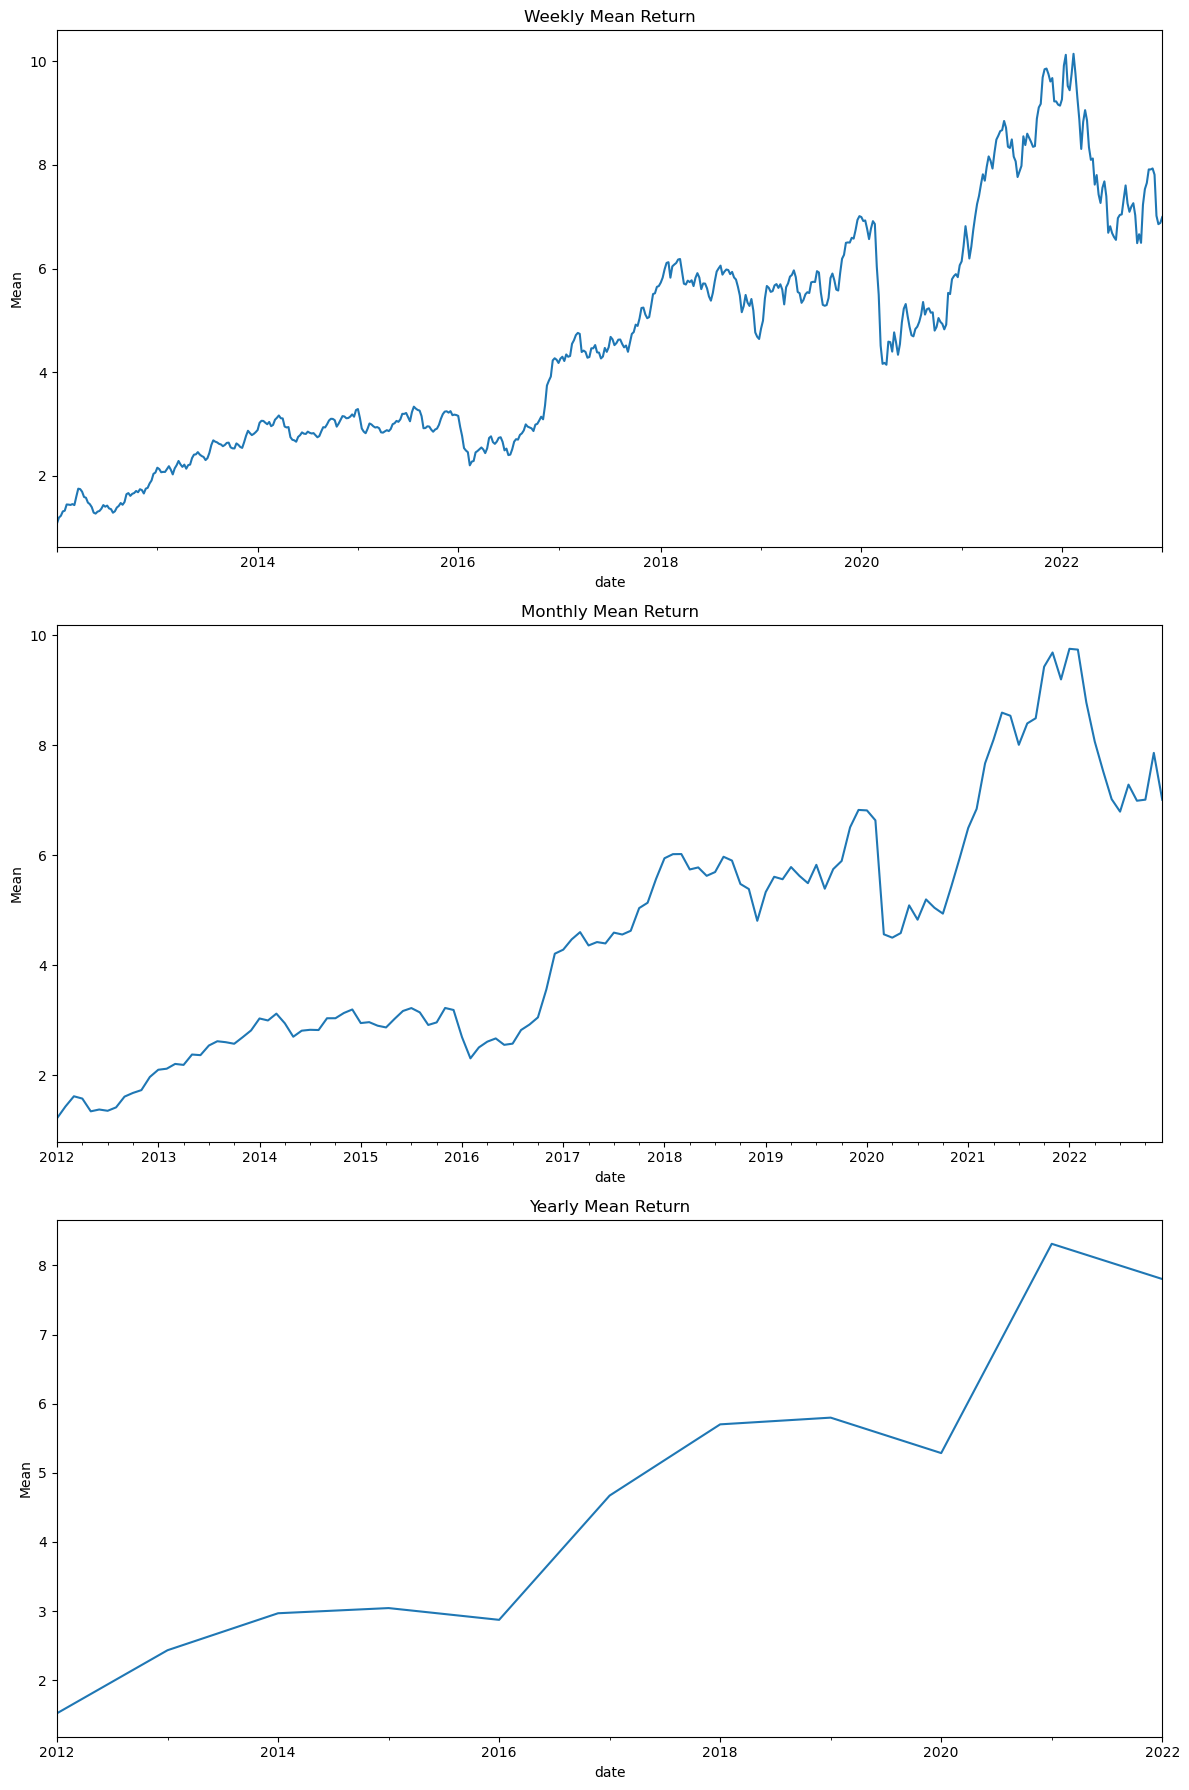

Average Means:
- Weekly: 4.582322
- Monthly: 4.583095
- Yearly: 4.583212
- All Time: 4.584078


In [4]:
df = merged_df.copy()
df.set_index('date', inplace=True)

df['growth_factor'] = 1 + df['RET']
df['cumulative_growth'] = df['growth_factor'].cumprod()
df['r'] = df['cumulative_growth']
weekly_mean = df['r'].resample('W').mean()
monthly_mean = df['r'].resample('M').mean()
yearly_mean = df['r'].resample('A').mean()
alltime_mean = df['r'].mean()

# Creating separate DataFrames for each frequency
mean_df_weekly = weekly_mean.to_frame(name='weekly_mean')
mean_df_monthly = monthly_mean.to_frame(name='monthly_mean')
mean_df_yearly = yearly_mean.to_frame(name='yearly_mean')

# Plotting each DataFrame
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

mean_df_weekly.plot(ax=axes[0], title='Weekly Mean Return', legend=False)
axes[0].set_ylabel('Mean')

mean_df_monthly.plot(ax=axes[1], title='Monthly Mean Return', legend=False)
axes[1].set_ylabel('Mean')

mean_df_yearly.plot(ax=axes[2], title='Yearly Mean Return', legend=False)
axes[2].set_ylabel('Mean')

plt.tight_layout()
plt.show()

# Calculating the average of the means for weekly, monthly, and yearly data
average_weekly_mean = mean_df_weekly['weekly_mean'].mean()
average_monthly_mean = mean_df_monthly['monthly_mean'].mean()
average_yearly_mean = mean_df_yearly['yearly_mean'].mean()

# Nicely formatted print of the average means
formatted_output_mean = (
    f"Average Means:\n"
    f"- Weekly: {average_weekly_mean:.6f}\n"
    f"- Monthly: {average_monthly_mean:.6f}\n"
    f"- Yearly: {average_yearly_mean:.6f}\n"
    f"- All Time: {alltime_mean:.6f}"
)

print(formatted_output_mean)

In [5]:
#Demeaned BOFA return
merged_df['r'] = merged_df['RET'] - merged_df['RET'].mean()

merged_df['f'] = merged_df['vwretd'] - merged_df['RF']
merged_df['f'] = merged_df['f'] - merged_df['f'].mean()
merged_df = merged_df[['date','r','f']]

merged_df['r'] = merged_df['r'].clip(lower=-0.07, upper=0.07)
merged_df['f'] = merged_df['f'].clip(lower=-0.05, upper=0.05)


In [6]:
merged_df['r_plus'] = np.maximum(merged_df['r'], 0)
merged_df['r_minus'] = np.minimum(merged_df['r'], 0)

merged_df['f_plus'] = np.maximum(merged_df['f'], 0)
merged_df['f_minus'] = np.minimum(merged_df['f'], 0)

In [7]:
merged_df['b_n'] = ((merged_df['r_minus']*merged_df['f_minus'])/merged_df['f']**2)
merged_df['b_p'] = ((merged_df['r_plus']*merged_df['f_plus'])/merged_df['f']**2)
merged_df['b_m_plus'] = ((merged_df['r_plus']*merged_df['f_minus'])/merged_df['f']**2)
merged_df['b_m_minus'] = ((merged_df['r_minus']*merged_df['f_plus'])/merged_df['f']**2)

In [8]:
merged_df['beta'] = merged_df['b_n'] + merged_df['b_p'] - merged_df['b_m_plus'] - merged_df['b_m_minus']
merged_df['beta'] = merged_df['beta'].clip(lower=0, upper=100)


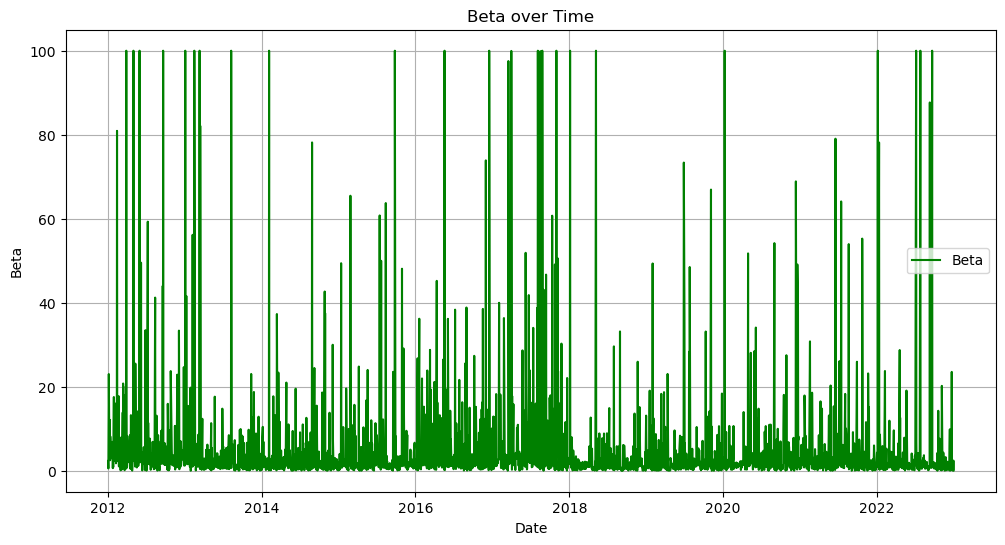

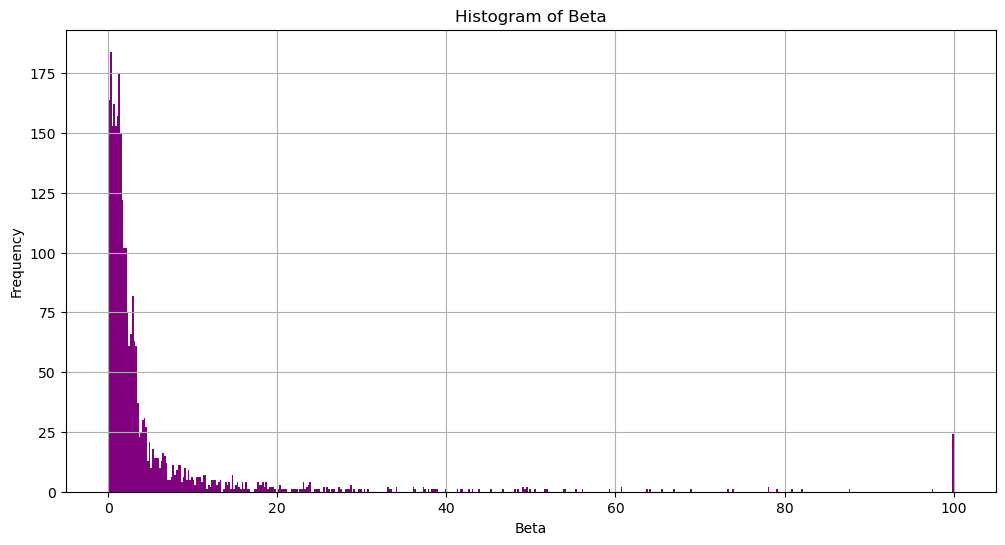

The average beta is: 5.11


In [9]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['beta'], label='Beta', color='green')
plt.title('Beta over Time')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(merged_df['beta'], bins=500, color='purple')
plt.title('Histogram of Beta')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

average_beta = merged_df['beta'].mean()
print(f"The average beta is: {average_beta:.2f}")

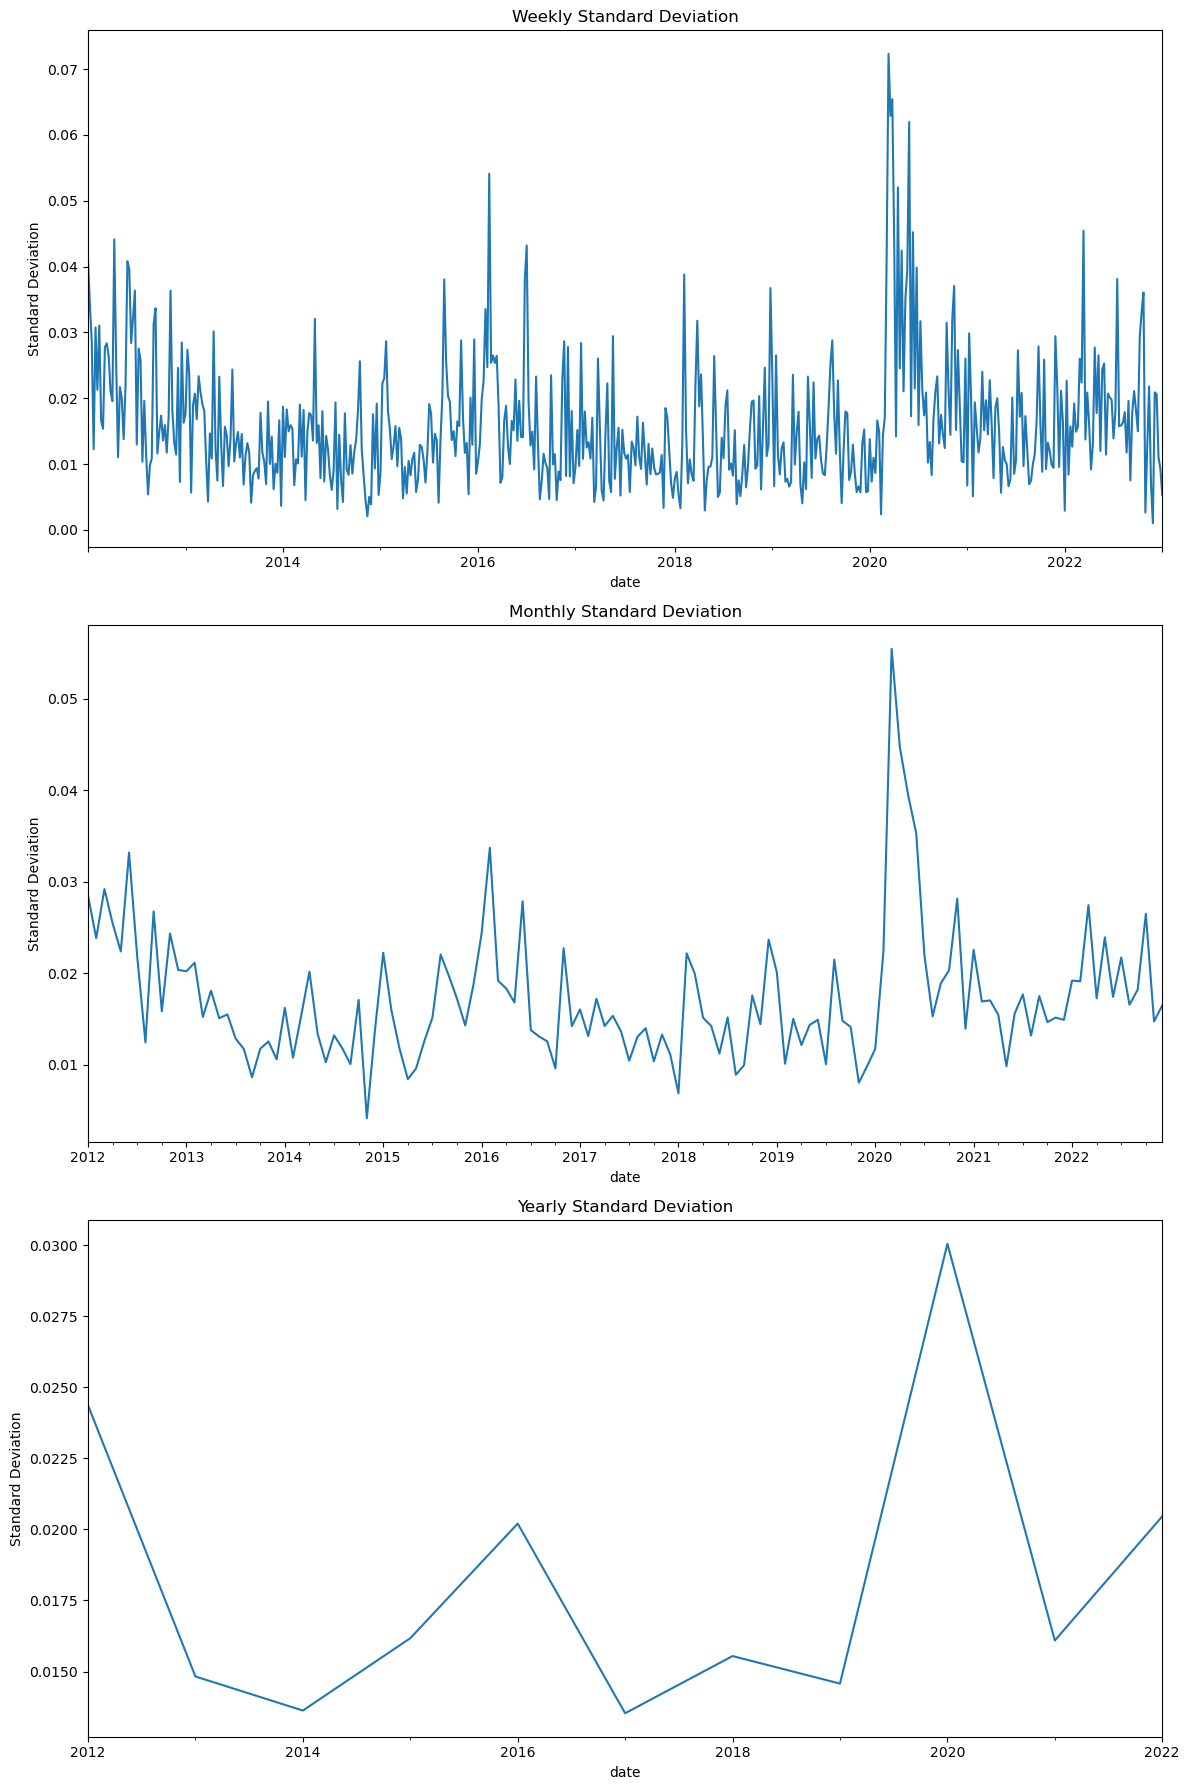

Average Standard Deviations:
- Weekly: 0.015976
- Monthly: 0.017353
- Yearly: 0.018131
- All Time: 0.018799


In [10]:
df = merged_df.copy()
df.set_index('date', inplace=True)

# Calculate weekly, monthly, and yearly standard deviations for column 'r'
weekly_std = df['r'].resample('W').std()
monthly_std = df['r'].resample('M').std()
yearly_std = df['r'].resample('A').std()
alltime_std = df['r'].std()

# Creating separate DataFrames for each frequency
std_df_weekly = weekly_std.to_frame(name='weekly_std')
std_df_monthly = monthly_std.to_frame(name='monthly_std')
std_df_yearly = yearly_std.to_frame(name='yearly_std')

# Plotting each DataFrame
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

std_df_weekly.plot(ax=axes[0], title='Weekly Standard Deviation', legend=False)
axes[0].set_ylabel('Standard Deviation')

std_df_monthly.plot(ax=axes[1], title='Monthly Standard Deviation', legend=False)
axes[1].set_ylabel('Standard Deviation')

std_df_yearly.plot(ax=axes[2], title='Yearly Standard Deviation', legend=False)
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

average_weekly_std = std_df_weekly['weekly_std'].mean()
average_monthly_std = std_df_monthly['monthly_std'].mean()
average_yearly_std = std_df_yearly['yearly_std'].mean()

formatted_output = (
    f"Average Standard Deviations:\n"
    f"- Weekly: {average_weekly_std:.6f}\n"
    f"- Monthly: {average_monthly_std:.6f}\n"
    f"- Yearly: {average_yearly_std:.6f}\n"
    f"- All Time: {alltime_std:.6f}"
)

print(formatted_output)


### 3.1 Analysis

The high beta of the stocks suggests that they are more risky than the overall market. This means that they are more likely to experience large price swings, both up and down. The high standard deviation of the stocks also confirms that they are subject to a high degree of variation. This means that their prices can fluctuate significantly over time

## 3.2 Short-interest in the bank’s stock. days it takes to cover the short-interest 


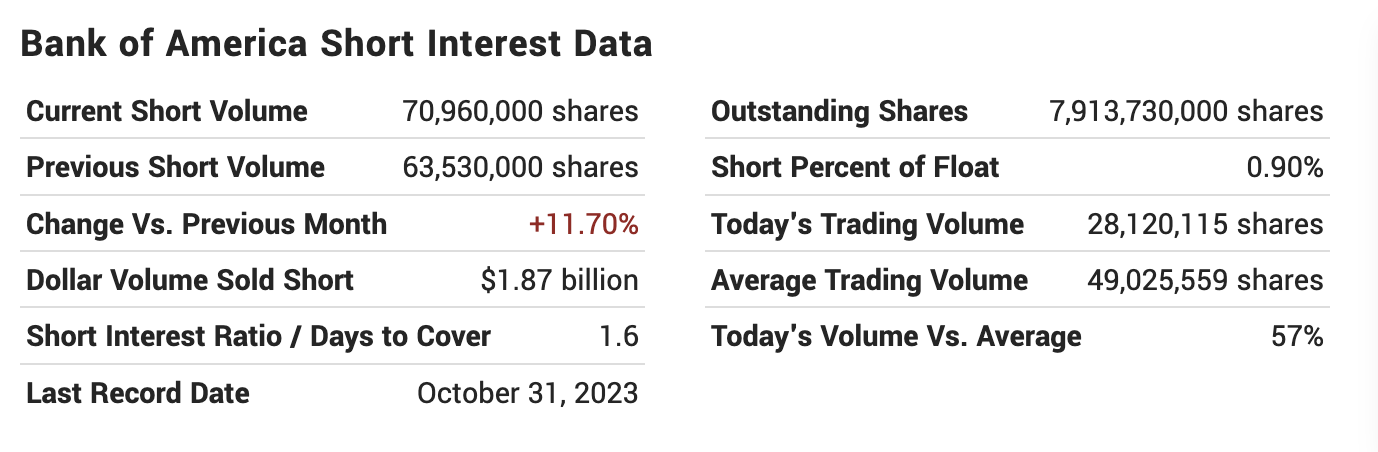

The current short interest data for Bank of America, as of October 31, 2023, shows a short volume of 70,960,000 shares, which is an increase from the previous short volume of 63,530,000 shares. This reflects a change of +11.70%. The dollar volume sold short is approximately 1.87 billion USD. The short interest ratio, also known as the days to cover, is currently 1.6​​. This ratio indicates the number of trading days it would take to cover all short positions in Bank of America's stock at the current average daily volume.

[Source](https://www.marketbeat.com/stocks/NYSE/BAC/short-interest/)


## 3.3 CDS prices

In [24]:
cds_5y = pd.read_csv("./data/BAC5YCDS.csv")
cds_1y = pd.read_csv("./data/BAC1YCDS.csv")

def convert_percentage_to_numeric(data, column_name):
    data[column_name] = data[column_name].str.rstrip('%').astype('float') / 100.0
    return data

cds_5y = convert_percentage_to_numeric(cds_5y, 'Change %')
cds_1y = convert_percentage_to_numeric(cds_1y, 'Change %')

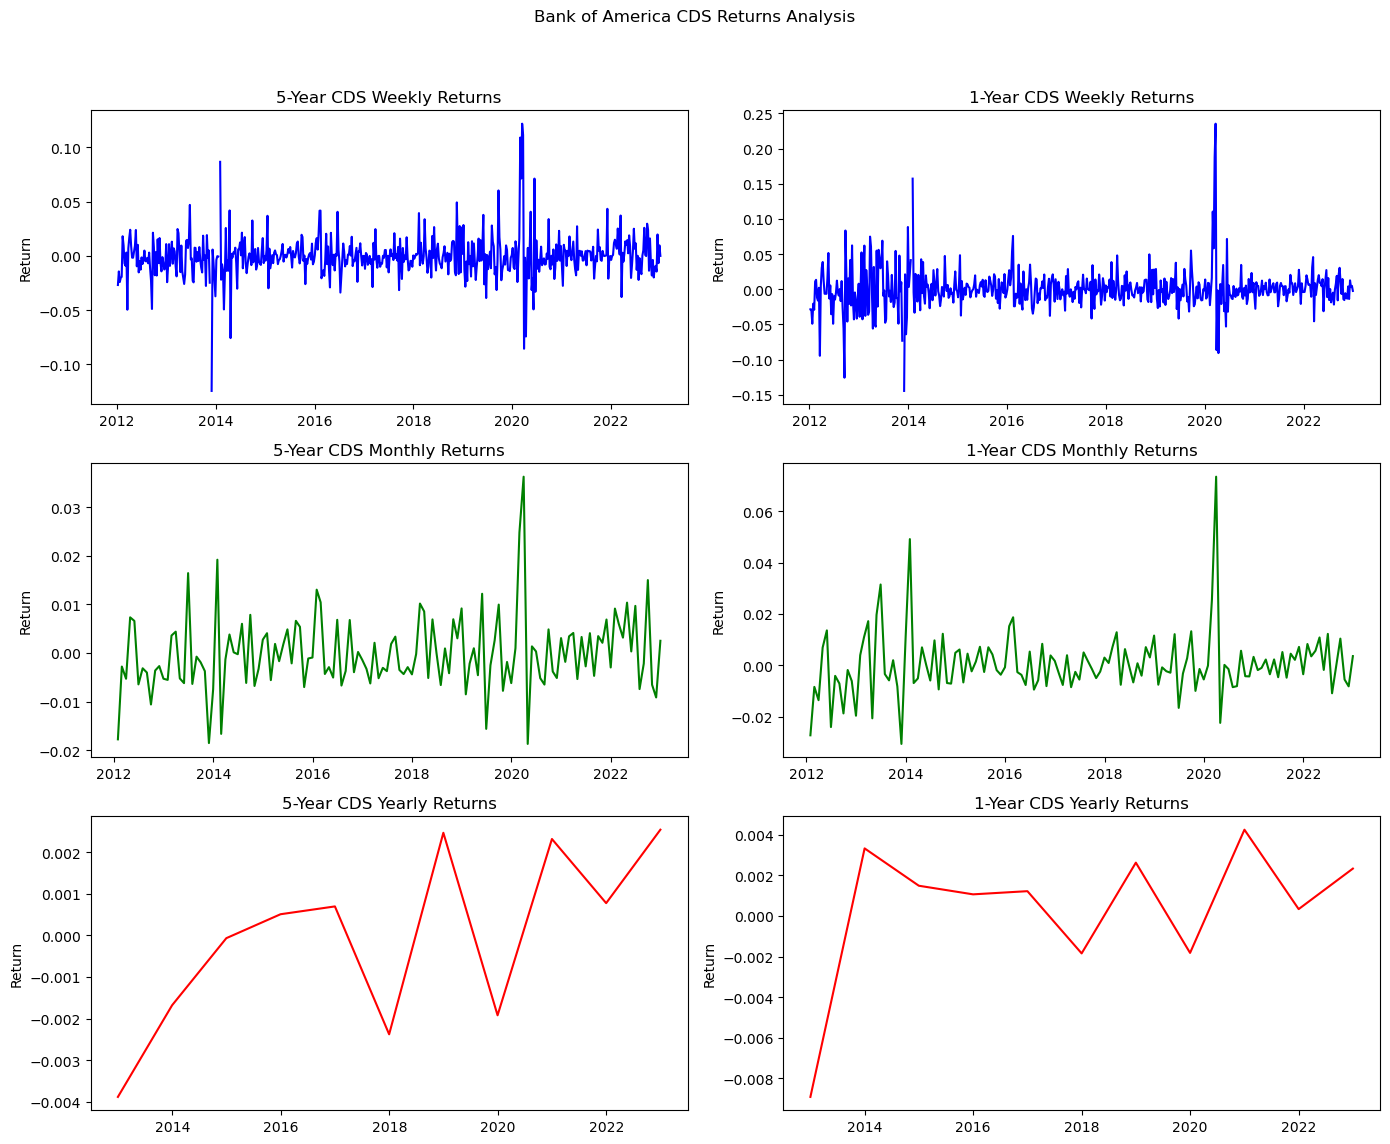

In [25]:
def calculate_returns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
    data['Return'] = data['Price'].pct_change()
    weekly = data.resample('W', on='Date').mean()
    monthly = data.resample('M', on='Date').mean()
    yearly = data.resample('A', on='Date').mean()
    mean_std = {
        'weekly': {'mean': weekly['Return'].mean(), 'std': weekly['Return'].std()},
        'monthly': {'mean': monthly['Return'].mean(), 'std': monthly['Return'].std()},
        'yearly': {'mean': yearly['Return'].mean(), 'std': yearly['Return'].std()}
    }
    return mean_std, weekly, monthly, yearly

mean_std_5y, weekly_5y, monthly_5y, yearly_5y = calculate_returns(cds_5y)
mean_std_1y, weekly_1y, monthly_1y, yearly_1y = calculate_returns(cds_1y)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Bank of America CDS Returns Analysis')
axes[0, 0].plot(weekly_5y['Return'], color='blue')
axes[0, 0].set_title('5-Year CDS Weekly Returns')
axes[0, 0].set_ylabel('Return')
axes[1, 0].plot(monthly_5y['Return'], color='green')
axes[1, 0].set_title('5-Year CDS Monthly Returns')
axes[1, 0].set_ylabel('Return')
axes[2, 0].plot(yearly_5y['Return'], color='red')
axes[2, 0].set_title('5-Year CDS Yearly Returns')
axes[2, 0].set_ylabel('Return')

axes[0, 1].plot(weekly_1y['Return'], color='blue')
axes[0, 1].set_title('1-Year CDS Weekly Returns')
axes[0, 1].set_ylabel('Return')
axes[1, 1].plot(monthly_1y['Return'], color='green')
axes[1, 1].set_title('1-Year CDS Monthly Returns')
axes[1, 1].set_ylabel('Return')
axes[2, 1].plot(yearly_1y['Return'], color='red')
axes[2, 1].set_title('1-Year CDS Yearly Returns')
axes[2, 1].set_ylabel('Return')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
def print_summary(mean_std, all_time_mean_std, title):
    print(f"--- {title} ---")
    print(f"Weekly Mean Return: {mean_std['weekly']['mean'] * 100:.4f}%")
    print(f"Weekly Standard Deviation: {mean_std['weekly']['std'] * 100:.4f}%")
    print(f"Monthly Mean Return: {mean_std['monthly']['mean'] * 100:.4f}%")
    print(f"Monthly Standard Deviation: {mean_std['monthly']['std'] * 100:.4f}%")
    print(f"Yearly Mean Return: {mean_std['yearly']['mean'] * 100:.4f}%")
    print(f"Yearly Standard Deviation: {mean_std['yearly']['std'] * 100:.4f}%")
    print(f"All Time Mean Return: {all_time_mean_std['mean'] * 100:.4f}%")
    print(f"All Time Standard Deviation: {all_time_mean_std['std'] * 100:.4f}%")
    print()

# All-time mean and standard deviation
cds_5y['Return'] = cds_5y['Price'].pct_change()
cds_1y['Return'] = cds_1y['Price'].pct_change()

all_time_mean_std_5y = {'mean': cds_5y['Return'].mean(), 'std': cds_5y['Return'].std()}
all_time_mean_std_1y = {'mean': cds_1y['Return'].mean(), 'std': cds_1y['Return'].std()}

# Print summaries
print_summary(mean_std_5y, all_time_mean_std_5y, "5-Year CDS")
print_summary(mean_std_1y, all_time_mean_std_1y, "1-Year CDS")


--- 5-Year CDS ---
Weekly Mean Return: -0.0341%
Weekly Standard Deviation: 1.9212%
Monthly Mean Return: -0.0081%
Monthly Standard Deviation: 0.7721%
Yearly Mean Return: -0.0057%
Yearly Standard Deviation: 0.2154%
All Time Mean Return: 0.1055%
All Time Standard Deviation: 3.1540%

--- 1-Year CDS ---
Weekly Mean Return: 0.0448%
Weekly Standard Deviation: 2.8040%
Monthly Mean Return: 0.0468%
Monthly Standard Deviation: 1.2252%
Yearly Mean Return: 0.0372%
Yearly Standard Deviation: 0.3627%
All Time Mean Return: 0.1939%
All Time Standard Deviation: 4.7488%



### Analysis
The graphs show weekly, monthly, and yearly returns for Bank of America's 1-year and 5-year CDS.

- 5-Year CDS: Exhibits smaller return fluctuations over time, with a slightly negative mean return, suggesting a stable yet slightly declining trend in CDS prices.

- 1Y CDS: Shows notable volatility, especially weekly and monthly. The short-term credit risk perception of Bank of America is showing increased volatility.

Based on the available data, it can be inferred that certain conclusions can be drawn.

The higher standard deviation in the 1-year CDS implies increased short-term volatility in market perceptions of Bank of America's credit risk, while the 5-year CDS reflects a more stable, long-term perspective.
The 5-year CDS shows a negative mean return, while the 1-year CDS shows a positive mean return. This may indicate varying market expectations or sentiments regarding Bank of America's credit risk in the short term versus the long term.Please provide me with a brief overview of your financial situation.

### 3.4. Credit Ratings  

 

Credit ratings and outlooks are opinions subject to ongoing review by the rating agencies and may change from time to time based on Bank of America's financial performance, industry dynamics, and other factors. 

- Overall, the credit ratings indicate that the borrower has a very strong overall creditworthiness and is considered to be a very low credit risk
- The higher the credit rating, the lower the perceived risk of the borrower and the lower the interest rate that the borrower will typically pay on its debt

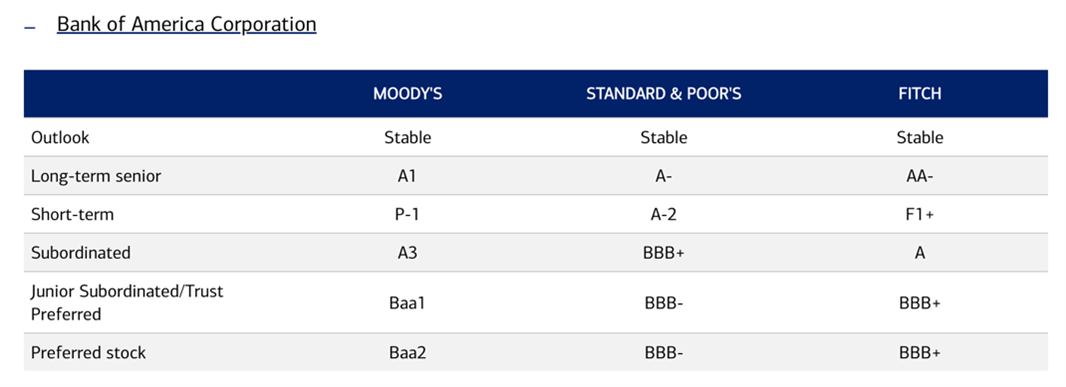

In [2]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'cr-1.png'

# Displaying the image
display(Image(filename=image_path))


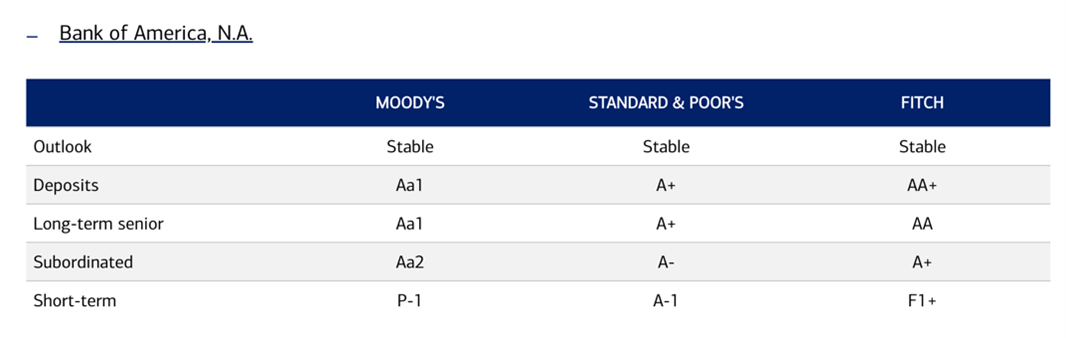

In [ ]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'cr-2.png'

# Displaying the image
display(Image(filename=image_path))


5\. Analyst Opinions

CONSENSUS: Buy

- Based on **22 analysts** offering recommendations for 'BAC'.

- Based on **analysts** offering 12 month price targets for **BAC** in the last 3 months. The average price target is **$33.65** with a high estimate of **$49** and a low estimate of **$27**.

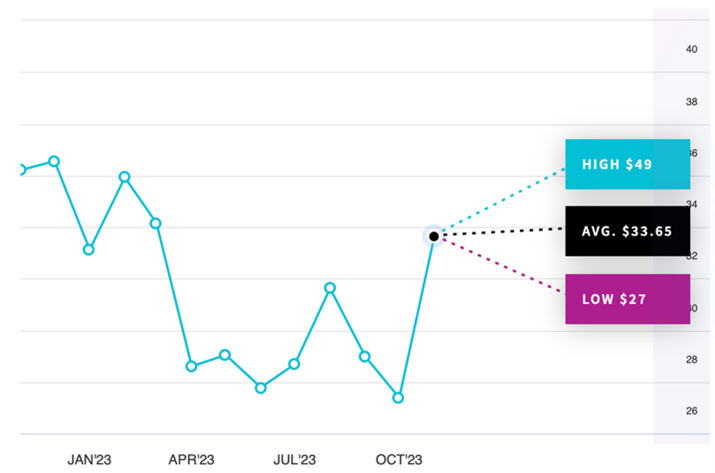

In [5]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'ao.png'

# Displaying the image
display(Image(filename=image_path))


**BAC Earnings Forecast**

Next quarter's earnings estimate for BAC is $0.68 with a range of $0.48 to $0.84. The previous quarter's EPS was $0.90. BAC beat its EPS estimate 100.00% of the time in the past 12 months, while its overall industry beat the EPS estimate 60.17% of the time in the same period. In the last calendar year BAC has Outperformed its overall industry.

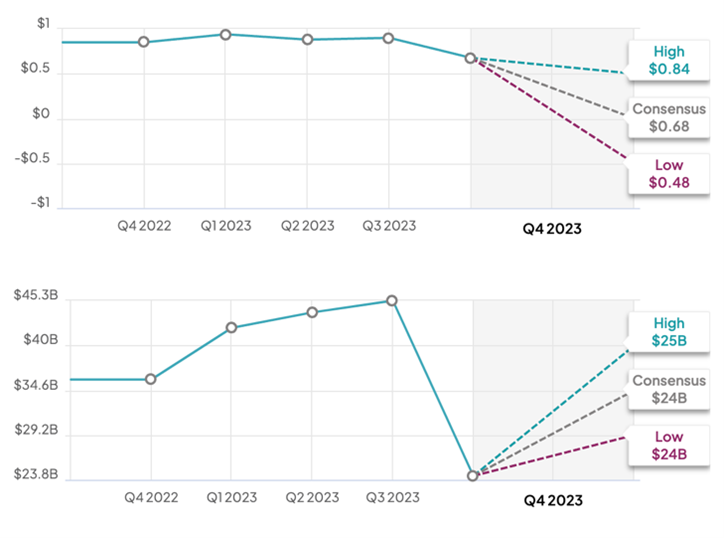

In [6]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'efo.png'

# Displaying the image
display(Image(filename=image_path))


**BAC Sales Forecast**

Next quarter's sales forecast for BAC is $24.30B with a range of $23.83B to $24.70B. The previous quarter's sales results were $45.33B. BAC beat its sales estimates 100.00% of the time in past 12 months, while its overall industry beat sales estimates 83.43% of the time in the same period. In the last calendar year BAC has Outperformed its overall industry.

## Q4 and Q5 FRY-9C Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Earnings

In [2]:
earnings = pd.DataFrame(columns=['date', 'earnings'])

In [3]:
q323 = pd.read_csv('data/Q3-2023.csv')
q323['ItemName'] = q323['ItemName'].astype(str)
q323['Value'] = pd.to_numeric(q323['Value'], errors='coerce')

In [4]:
te_value = q323[q323['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2023 
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [5]:
q223 = pd.read_csv('data/Q2-2023.csv')
q223['ItemName'] = q223['ItemName'].astype(str)
q223['Value'] = pd.to_numeric(q223['Value'], errors='coerce')
te_value = q223[q223['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2023
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [6]:
q123 = pd.read_csv('data/Q1-2023.csv')
q123['ItemName'] = q123['ItemName'].astype(str)
q123['Value'] = pd.to_numeric(q123['Value'], errors='coerce')
te_value = q123[q123['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2023 
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [7]:
q122 = pd.read_csv('data/Q1-2022.csv')
q122['ItemName'] = q122['ItemName'].astype(str)
q122['Value'] = pd.to_numeric(q122['Value'], errors='coerce')
te_value = q122[q122['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2022 
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [8]:
q222 = pd.read_csv('data/Q2-2022.csv')
q222['ItemName'] = q222['ItemName'].astype(str)
q222['Value'] = pd.to_numeric(q222['Value'], errors='coerce')
te_value = q222[q222['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2022
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [9]:
q322 = pd.read_csv('data/Q3-2022.csv')
q322['ItemName'] = q322['ItemName'].astype(str)
q322['Value'] = pd.to_numeric(q322['Value'], errors='coerce')
te_value = q322[q322['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2022
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [10]:
q422 = pd.read_csv('data/Q4-2022.csv')
q422['ItemName'] = q422['ItemName'].astype(str)
q422['Value'] = pd.to_numeric(q422['Value'], errors='coerce')
te_value = q422[q422['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2022
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [11]:
q421 = pd.read_csv('data/Q4-2021.csv')
q421['ItemName'] = q421['ItemName'].astype(str)
q421['Value'] = pd.to_numeric(q421['Value'], errors='coerce')
te_value = q421[q421['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2021
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [12]:
q321 = pd.read_csv('data/Q3-2021.csv')
q321['ItemName'] = q321['ItemName'].astype(str)
q321['Value'] = pd.to_numeric(q321['Value'], errors='coerce')
te_value = q321[q321['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2021
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [13]:
q221 = pd.read_csv('data/Q2-2021.csv')
q221['ItemName'] = q221['ItemName'].astype(str)
q221['Value'] = pd.to_numeric(q221['Value'], errors='coerce')
te_value = q221[q221['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2021
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [14]:
q121 = pd.read_csv('data/Q1-2021.csv')
q121['ItemName'] = q121['ItemName'].astype(str)
q121['Value'] = pd.to_numeric(q121['Value'], errors='coerce')
te_value = q121[q121['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2021
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [15]:
q420 = pd.read_csv('data/Q4-2020.csv')
q420['ItemName'] = q420['ItemName'].astype(str)
q420['Value'] = pd.to_numeric(q420['Value'], errors='coerce')
te_value = q420[q420['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2020
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [16]:
q320 = pd.read_csv('data/Q3-2020.csv')
q320['ItemName'] = q320['ItemName'].astype(str)
q320['Value'] = pd.to_numeric(q320['Value'], errors='coerce')
te_value = q320[q320['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2020
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [17]:
q220 = pd.read_csv('data/Q2-2020.csv')
q220['ItemName'] = q220['ItemName'].astype(str)
q220['Value'] = pd.to_numeric(q220['Value'], errors='coerce')
te_value = q220[q220['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2020
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [18]:
q120 = pd.read_csv('data/Q1-2020.csv')
q120['ItemName'] = q120['ItemName'].astype(str)
q120['Value'] = pd.to_numeric(q120['Value'], errors='coerce')
te_value = q120[q120['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2020
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [19]:
q419 = pd.read_csv('data/Q4-2019.csv')
q419['ItemName'] = q419['ItemName'].astype(str)
q419['Value'] = pd.to_numeric(q419['Value'], errors='coerce')
te_value = q419[q419['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2019
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [20]:
q319 = pd.read_csv('data/Q3-2019.csv')
q319['ItemName'] = q319['ItemName'].astype(str)
q319['Value'] = pd.to_numeric(q319['Value'], errors='coerce')

te_value = q319[q319['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2019
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [21]:
q219 = pd.read_csv('data/Q2-2019.csv')
q219['ItemName'] = q219['ItemName'].astype(str)
q219['Value'] = pd.to_numeric(q219['Value'], errors='coerce')
te_value = q219[q219['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2019
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

In [22]:
q119 = pd.read_csv('data/Q1-2019.csv')
q119['ItemName'] = q119['ItemName'].astype(str)
q119['Value'] = pd.to_numeric(q119['Value'], errors='coerce')
te_value = q119[q119['ItemName'] == 'BHCK4340']['Value'].iloc[0]
year = 2019
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'earnings': [te_value]})
earnings = pd.concat([earnings, data_to_insert_df], ignore_index=True)

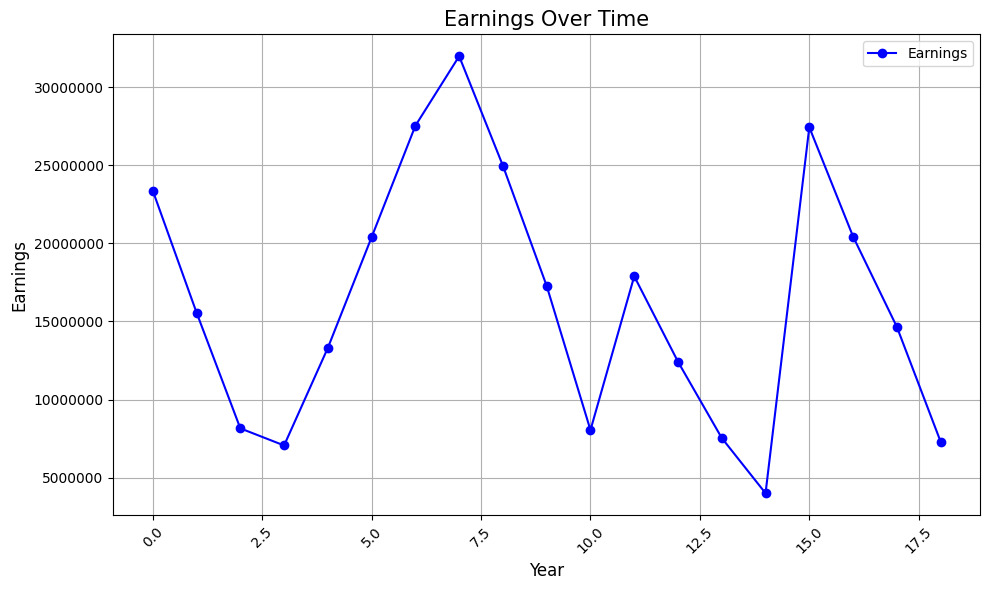

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(earnings.index, earnings['earnings'], marker='o', color='b', label='Earnings')

# Beautifying the plot
plt.title('Earnings Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Earnings', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Using plain format, not scientific notation
plt.tight_layout()

# Show plot
plt.show()

-   Volatility in Earnings: The graph shows significant volatility in earnings over the observed period. There are sharp increases and decreases from one period to the next, which could indicate the bank's earnings are heavily influenced by external factors or internal business cycles.

-   Peak Earnings Mid-Period: There's a notable peak in earnings around the middle of the time frame, followed by a sharp decline. This peak could be the result of a particularly successful quarter or a successful business venture or investment that did not sustain in subsequent periods.

-   Recovery and Growth Trend: Despite the volatility, there appears to be a recovery with a growth trend towards the end of the period. This suggests that the bank may have implemented successful strategies to overcome previous losses or that market conditions have become more favorable, resulting in increased earnings.

## Interest Rate Margin

In [24]:
interest = pd.DataFrame(columns=['date', 'interest income','total assets'])

In [25]:
ie = q323[q323['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q323[q323['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2023 
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [26]:
ie = q223[q223['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q223[q223['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2023 
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [27]:
ie = q123[q123['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q123[q123['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2023 
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [28]:
ie = q422[q422['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q422[q422['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2022
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [29]:
ie = q322[q322['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q322[q322['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2022
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [30]:
ie = q222[q222['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q222[q222['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2022
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [31]:
ie = q122[q122['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q122[q122['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2022
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [32]:
ie = q421[q421['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q421[q421['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2021
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)


ie = q321[q321['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q321[q321['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2021
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q221[q221['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q221[q221['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2021
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q121[q121['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q121[q121['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2021
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [33]:
ie = q420[q420['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q420[q420['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2020
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)


ie = q320[q320['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q320[q320['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2020
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q220[q220['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q220[q220['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2020
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q120[q120['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q120[q120['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2020
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [34]:
ie = q419[q419['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q419[q419['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2019
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)


ie = q319[q319['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q319[q319['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2019
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q219[q219['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q219[q219['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2019
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

ie = q119[q119['ItemName'] == 'BHCK4107']['Value'].iloc[0]
assets = q119[q119['ItemName'] == 'BHCT2170']['Value'].iloc[0]
year = 2019
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'interest income': [ie], 'total assets':[assets]})
interest = pd.concat([interest, data_to_insert_df], ignore_index=True)

In [35]:
# Calculating the interest rate margin for each row in the DataFrame
interest['interest_rate_margin'] = (interest['interest income'] / interest['total assets']) * 100

In [36]:
interest['date'] = pd.to_datetime(interest['date'])
interest.set_index('date', inplace=True)

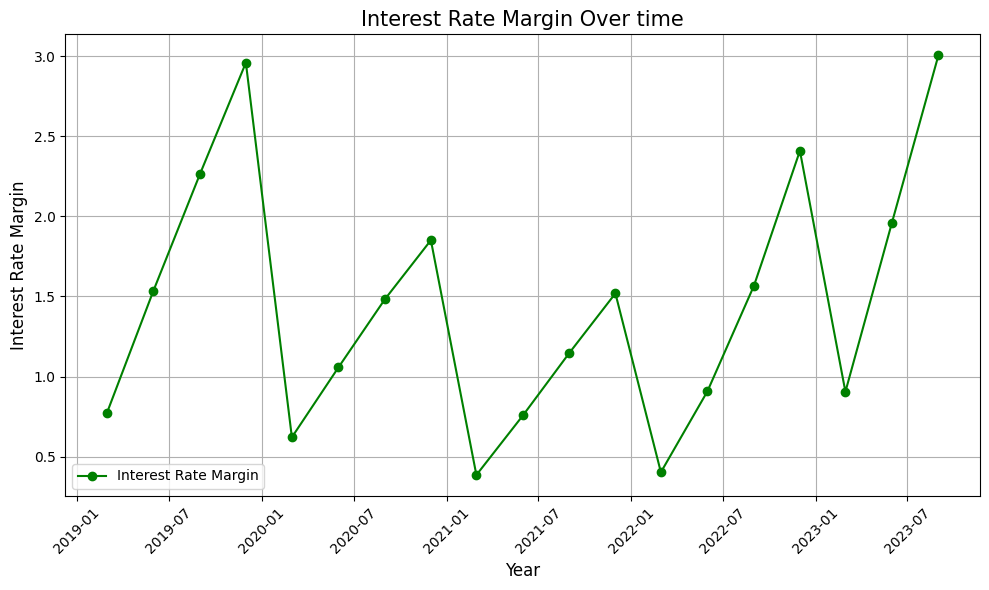

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(interest.index, interest['interest_rate_margin'], marker='o', color='g', label='Interest Rate Margin')

# Beautifying the plot
plt.title('Interest Rate Margin Over time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Interest Rate Margin', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Using plain format, not scientific notation
plt.tight_layout()

# Show plot
plt.show()

-   Cyclical Variations: The interest rate margin has experienced cyclical variations over the observed period, with peaks and troughs occurring at regular intervals. This pattern may be related to macroeconomic interest rate cycles, changes in the bank's lending and deposit structures, or adjustments to the Federal Reserve's monetary policy.

-   Rebounding Strength: After a notable dip, there is a strong rebound visible in the later years, suggesting that the bank has possibly adjusted its interest-earning strategies or benefited from rising interest rates, which have positively impacted its interest rate margins.

-   Resilience in Margin: Despite the fluctuations, the interest rate margin shows resilience, particularly in the most recent periods. This could imply a strong asset-liability management strategy that allows the bank to maintain a relatively stable and possibly growing net interest income despite changes in market rates.

## Non Interest Income

In [38]:
nii = pd.DataFrame(columns=['date', 'nii income'])

In [39]:
ni = q323[q323['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2023
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q223[q223['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2023
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q123[q123['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2023
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

In [40]:
ni = q422[q422['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2022
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)


ni = q322[q322['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2022
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q222[q222['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2022
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q122[q122['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2022
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

In [41]:
ni = q421[q421['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2021
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)


ni = q321[q321['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2021
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q221[q221['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2021
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q121[q121['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2021
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

In [42]:
ni = q420[q420['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2020
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)


ni = q320[q320['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2020
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q220[q220['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2020
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q120[q120['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2020
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

In [43]:
ni = q419[q419['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2019
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)


ni = q319[q319['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2019
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q219[q219['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2019
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

ni = q119[q119['ItemName'] == 'BHCK4079']['Value'].iloc[0]
year = 2019
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'nii income': [ni]})
nii = pd.concat([nii, data_to_insert_df], ignore_index=True)

In [44]:
nii['date'] = pd.to_datetime(nii['date'])
nii.set_index('date', inplace=True)

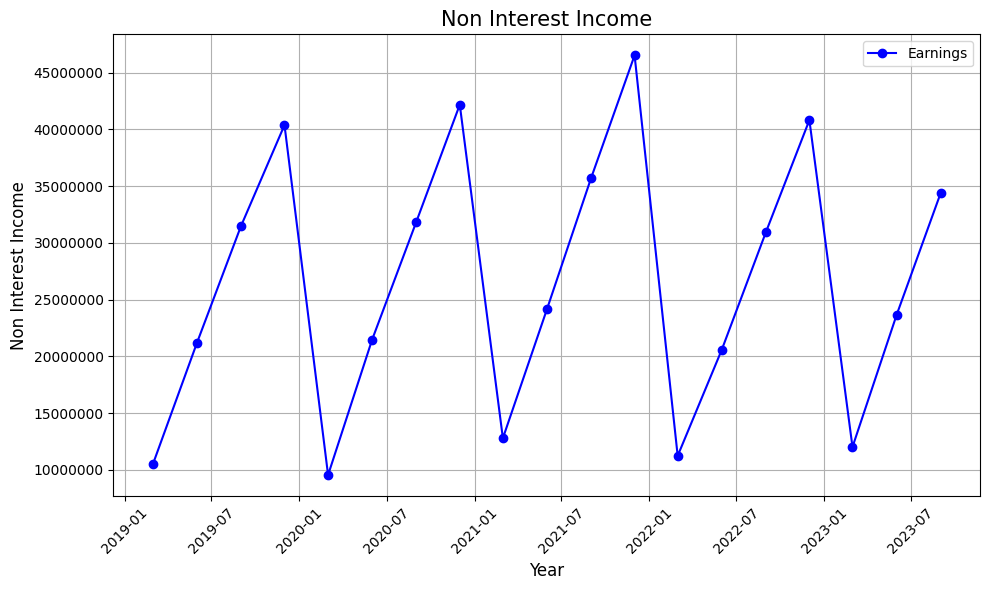

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nii.index, nii['nii income'], marker='o', color='b', label='Earnings')

# Beautifying the plot
plt.title('Non Interest Income', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Non Interest Income', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Using plain format, not scientific notation
plt.tight_layout()

# Show plot
plt.show()

-   Fluctuating Revenue Stream: The graph displays a fluctuating pattern in non-interest income, suggesting variability in revenue streams that do not come from the bank's interest-earning assets. This could be indicative of changing fee income, service charges, or other operational factors.

-   Significant Peaks and Troughs: There are noticeable peaks and troughs throughout the period, indicating periods of significant increases in non-interest income followed by sharp decreases. This could reflect the impact of economic cycles, regulatory changes, or one-time events affecting fee-based income.

-   Overall Upward Trend: Despite the fluctuations, there appears to be an overall upward trend in non-interest income towards the latter part of the observed period. This might suggest a strategic shift towards increasing revenue from services and products that are not tied to interest rates, or possibly a general growth in the bank's non-interest income-generating activities.

## Revenue

In [46]:
revenue = pd.DataFrame(columns=['date', 'trading revenue','vc  revenue'])

In [47]:
tr = q323[q323['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q323[q323['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2023
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q223[q223['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q223[q223['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2023
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q123[q123['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q123[q123['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2023
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

In [48]:
tr = q422[q422['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q422[q422['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2022
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q322[q322['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q322[q322['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2022
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q222[q222['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q222[q222['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2022
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q122[q122['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q122[q122['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2022
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)


In [49]:
tr = q421[q421['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q421[q421['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2021
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q321[q321['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q321[q321['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2021
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q221[q221['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q221[q221['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2021
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q121[q121['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q121[q121['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2021
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)


In [50]:
tr = q420[q420['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q420[q420['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2020
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q320[q320['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q320[q320['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2020
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q220[q220['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q220[q220['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2020
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q120[q120['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q120[q120['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2020
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)


In [51]:
tr = q419[q419['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q419[q419['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2019
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q319[q319['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q319[q319['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2019
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q219[q219['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q219[q219['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2019
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)

tr = q119[q119['ItemName'] == 'BHCKA220']['Value'].iloc[0]
vc = q119[q119['ItemName'] == 'BHCKB491']['Value'].iloc[0]
year = 2019
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'trading revenue': [tr], 'vc  revenue':[vc]})
revenue = pd.concat([revenue, data_to_insert_df], ignore_index=True)


In [52]:
revenue['date'] = pd.to_datetime(revenue['date'])
revenue.set_index('date', inplace=True)

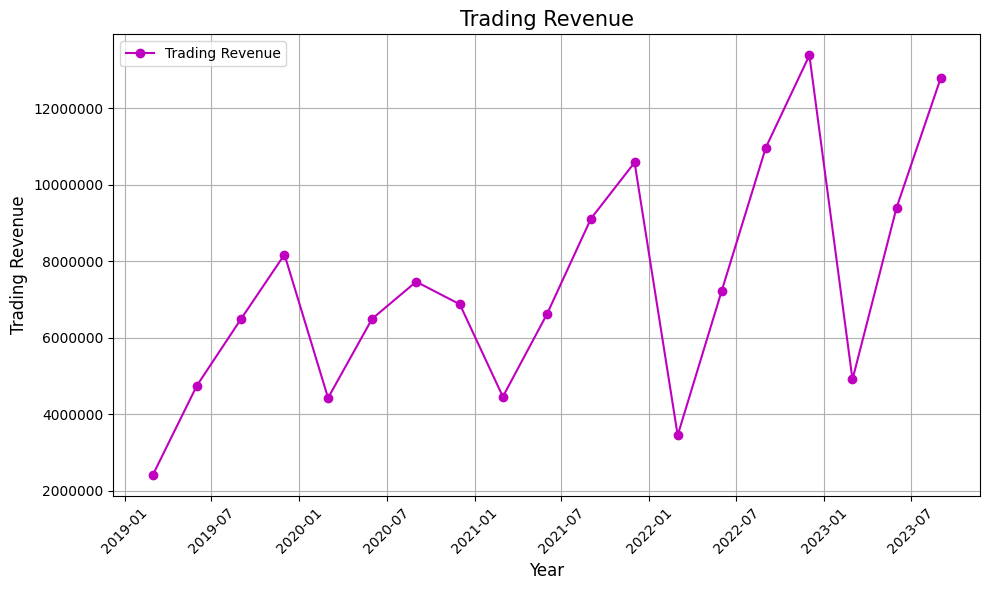

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(revenue.index, revenue['trading revenue'], marker='o', color='m', label='Trading Revenue')

# Beautifying the plot
plt.title('Trading Revenue', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trading Revenue', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Using plain format, not scientific notation
plt.tight_layout()

# Show plot
plt.show()

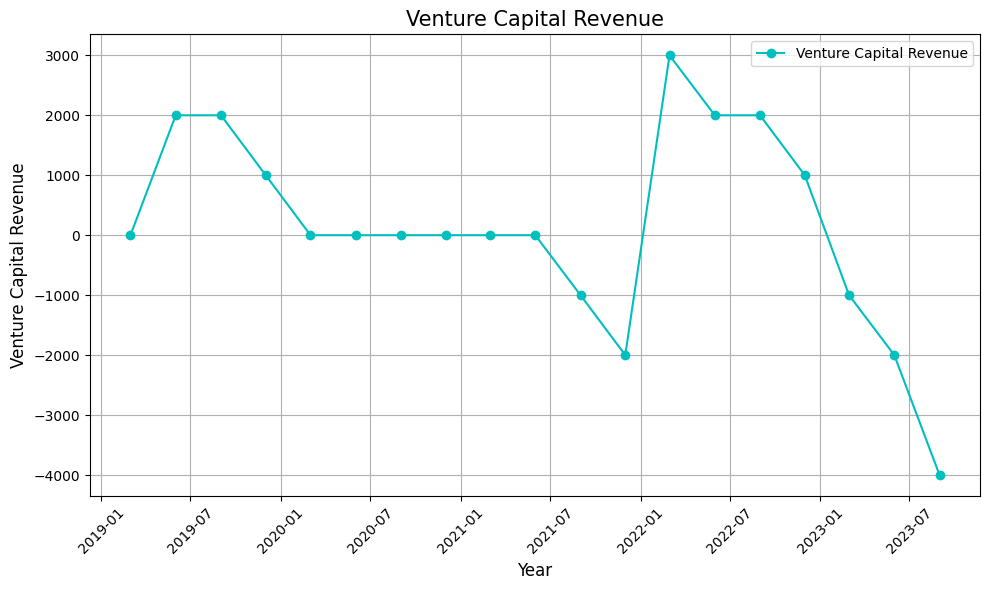

In [54]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(revenue.index, revenue['vc  revenue'], marker='o', color='c', label='Venture Capital Revenue')

# Beautifying the plot
plt.title('Venture Capital Revenue', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Venture Capital Revenue', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Using plain format, not scientific notation
plt.tight_layout()

# Show plot
plt.show()

Trading Revenue Analysis:

-   Growth and Volatility: The trading revenue shows a pattern of growth with intermittent volatility. The peaks indicate periods of high trading income which could correspond with market volatility or successful trading strategies.

-   Resilience to Market Changes: Despite fluctuations, there's a general upward trajectory in trading revenue, suggesting an ability to capitalize on market conditions and perhaps a strong trading infrastructure.

-   Market Sensitivity: The periodic spikes could also reflect the bank's sensitivity to market conditions, as trading desks might benefit from increased market activity and volatility during certain periods.

Venture Capital Revenue Analysis:

-   High Risk-Reward: The venture capital revenue demonstrates significant variability, which is characteristic of the high-risk, high-reward nature of venture capital investments.

-   Recent Downward Trend: There's a noticeable sharp decline in the most recent periods, indicating potential write-downs or losses in the bank's venture capital portfolio or a downturn in the startup ecosystem.

-   Potential for Rebound: The cyclical nature of the venture capital market suggests there could be potential for future rebounds, as periods of losses can be followed by significant gains when investments mature or are successfully exited.

## Loan Mix

In [55]:
loan_mix = pd.DataFrame(columns=['date', 'construction loans','commerical real estate loans','residential real estate loans','commercial loans','credit cards','other consumer loans','total loans'])

In [56]:
consl = q323[q323['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q323[q323['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q323[q323['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q323[q323['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q323[q323['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q323[q323['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q323[q323['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2023
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)



consl = q223[q223['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q223[q223['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q223[q223['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q223[q223['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q223[q223['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q223[q223['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q223[q223['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2023
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


consl = q123[q123['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q123[q123['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q123[q123['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q123[q123['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q123[q123['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q123[q123['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q123[q123['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2023
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


In [57]:
consl = q422[q422['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q422[q422['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q422[q422['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q422[q422['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q422[q422['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q422[q422['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q422[q422['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2022
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)




consl = q322[q322['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q322[q322['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q322[q322['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q322[q322['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q322[q322['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q322[q322['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q322[q322['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2022
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)



consl = q222[q222['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q222[q222['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q222[q222['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q222[q222['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q222[q222['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q222[q222['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q222[q222['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2022
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


consl = q122[q122['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q122[q122['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q122[q122['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q122[q122['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q122[q122['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q122[q122['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q122[q122['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2022
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


In [58]:
consl = q421[q421['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q421[q421['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q421[q421['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q421[q421['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q421[q421['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q421[q421['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q421[q421['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2021
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)




consl = q321[q321['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q321[q321['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q321[q321['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q321[q321['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q321[q321['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q321[q321['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q321[q321['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2021
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)



consl = q221[q221['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q221[q221['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q221[q221['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q221[q221['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q221[q221['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q221[q221['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q221[q221['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2021
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


consl = q121[q121['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q121[q121['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q121[q121['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q121[q121['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q121[q121['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q121[q121['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q121[q121['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2021
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


In [59]:
consl = q420[q420['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q420[q420['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q420[q420['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q420[q420['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q420[q420['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q420[q420['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q420[q420['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2020
month = 12
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)




consl = q320[q320['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q320[q320['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q320[q320['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q320[q320['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q320[q320['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q320[q320['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q320[q320['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2020
month = 9
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)



consl = q220[q220['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q220[q220['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q220[q220['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q220[q220['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q220[q220['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q220[q220['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q220[q220['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2020
month = 6
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


consl = q120[q120['ItemName'] == 'BHCKJJ04']['Value'].iloc[0]
comrl = q120[q120['ItemName'] == 'BHCKJJ05']['Value'].iloc[0]
rrl = q120[q120['ItemName'] == 'BHCKJJ06']['Value'].iloc[0]
coml = q120[q120['ItemName'] == 'BHCKJJ07']['Value'].iloc[0]
cc = q120[q120['ItemName'] == 'BHCKJJ08']['Value'].iloc[0]
oconsul = q120[q120['ItemName'] == 'BHCKJJ09']['Value'].iloc[0]
tl = q120[q120['ItemName'] == 'BHCKJJ11']['Value'].iloc[0]
year = 2020
month = 3
date_object = pd.Timestamp(year=year, month=month, day=1)
# Correctly forming the DataFrame
data_to_insert_df = pd.DataFrame({'date': [date_object], 'construction loans': [consl], 'commerical real estate loans':[comrl], 'residential real estate loans':[rrl], 'commercial loans':[coml], 'credit cards':[cc], 'other consumer loans':[oconsul], 'total loans':[tl]
})
loan_mix = pd.concat([loan_mix, data_to_insert_df], ignore_index=True)


In [67]:
loan_mix.head(20)

,date,construction loans,commerical real estate loans,residential real estate loans,commercial loans,credit cards,other consumer loans,total loans
0,2023-09-01,10216000.0,62977000.0,254668000.0,549236000.0,99686000.0,104181000.0,1.080964e+09
1,2023-06-01,9731000.0,64559000.0,254458000.0,553810000.0,97009000.0,104545000.0,1.084112e+09
2,2023-03-01,9679000.0,63372000.0,254705000.0,548337000.0,92469000.0,104661000.0,1.073223e+09
3,2022-12-01,9421000.0,60344000.0,256247000.0,543557000.0,93421000.0,106392000.0,1.069382e+09
4,2022-09-01,8659000.0,59293000.0,255920000.0,546089000.0,87296000.0,107330000.0,1.064587e+09
5,2022-06-01,7800000.0,56453000.0,255112000.0,546717000.0,84010000.0,109021000.0,1.059113e+09
6,2022-03-01,7493000.0,55040000.0,252993000.0,524363000.0,79356000.0,105958000.0,1.025203e+09
7,2021-12-01,7742000.0,55266000.0,249932000.0,517842000.0,81438000.0,103751000.0,1.015971e+09
8,2021-09-01,8295000.0,52428000.0,246038000.0,485464000.0,76869000.0,100046000.0,9.691400e+08
9,2021-06-01,8150000.0,51457000.0,244891000.0,482501000.0,75599000.0,97074000.0,9.596720e+08


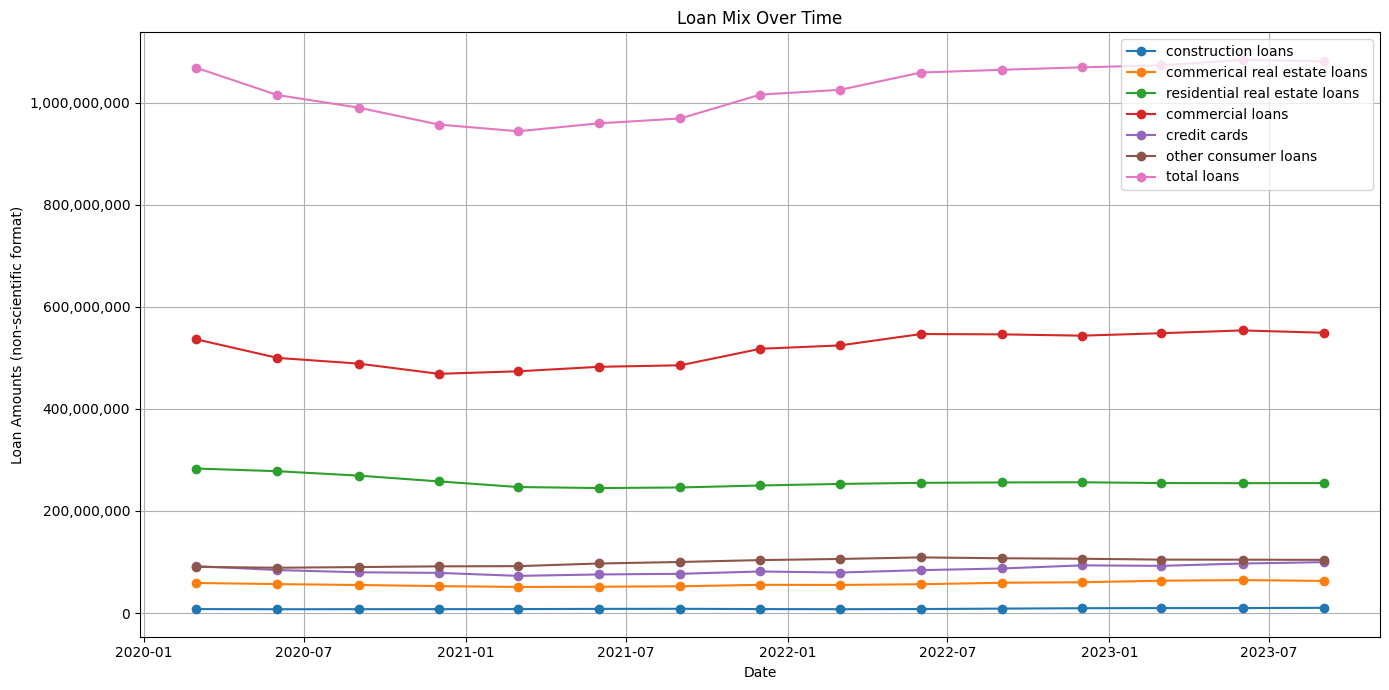

In [68]:
loan_mix.set_index('date', inplace=True)

# Plotting all columns against the date
plt.figure(figsize=(14, 7))

# Plot each loan category
for column in loan_mix.columns:
    plt.plot(loan_mix.index, loan_mix[column], label=column, marker='o')

# Beautifying the plot
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Loan Mix Over Time')
plt.xlabel('Date')
plt.ylabel('Loan Amounts (non-scientific format)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots.

# Show the plot
plt.show()

-   Commercial Loans Dominate: Commercial loans are the largest category among the total loans disbursed, with amounts ranging from approximately 468.76 million to $549.24 million over the observed period.

-   Residential Real Estate Loans in Second: Residential real estate loans are the second-highest category, with loan amounts significantly lower than commercial loans but higher than the other categories, ranging from approximately 244.89 million to $277.92 million.

Further insights:

-   Steady Growth in Total Loans: The total loans have shown a general trend of increase over time, suggesting growth in the bank's lending business.

-   Fluctuations in Construction and Consumer Loans: Construction loans and other consumer loans have fluctuated but remained the smaller portions of the loan mix, indicating a more conservative stance in these sectors compared to commercial and residential lending.

-   Increase in Credit Card Loans: There has been an increase in credit card loans, which could reflect consumer confidence or greater consumer spending.

-   Stability in Commercial Real Estate Loans: Commercial real estate loans have remained relatively stable compared to other categories, which may suggest a steady demand in the commercial real estate market or a consistent lending strategy in this segment by the bank.

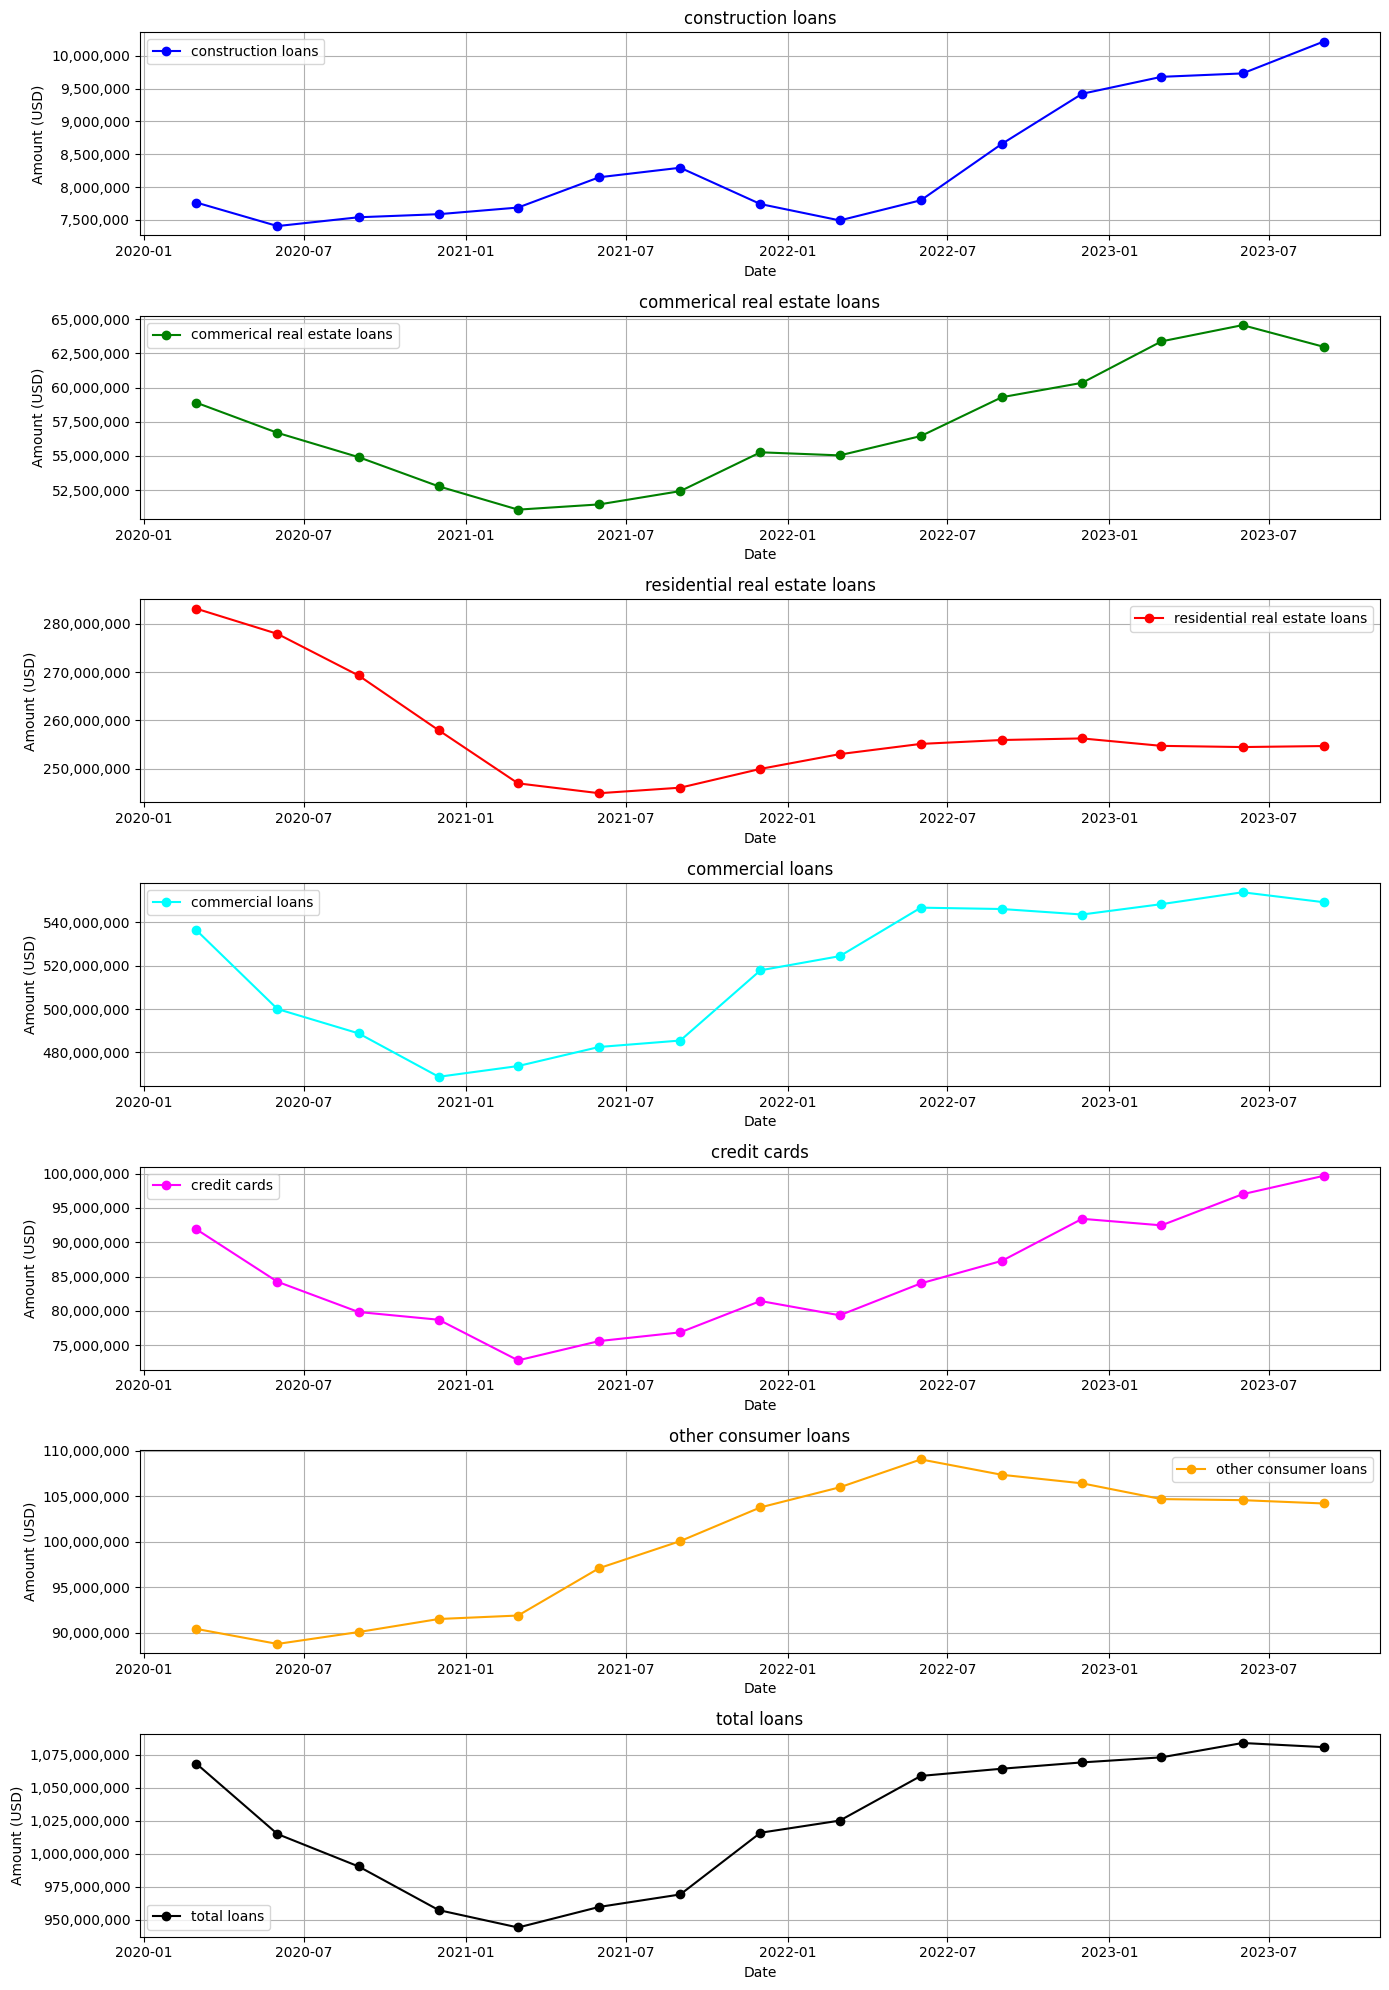

In [71]:
# Creating individual plots for each loan category
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(14, 20))

# List of colors for the plots
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'black']

for i, column in enumerate(loan_mix.columns[0:]):  # Skipping 'date' column for plotting
    axes[i].plot(loan_mix.index, loan_mix[column], label=column, marker='o', color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Amount (USD)')
    axes[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

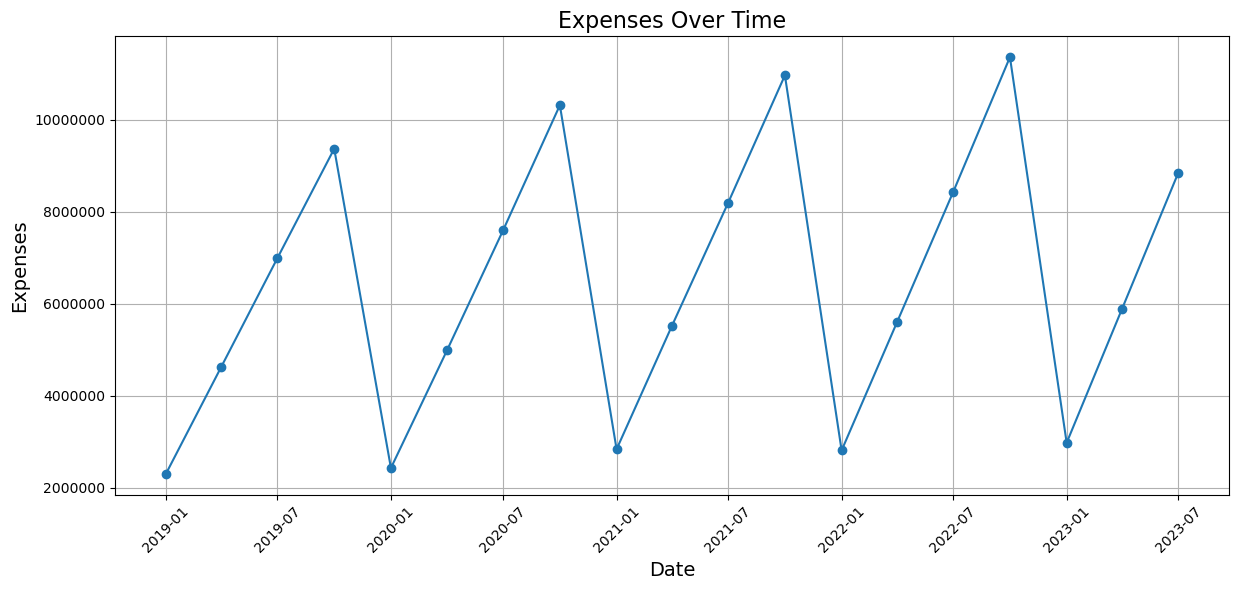

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_data(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df[df.columns[1]], marker='o')  # Assuming the second column contains the data to be plotted
    plt.title(title + " Over Time", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(title, fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.ticklabel_format(style = "plain", axis = "y")
    plt.show()

def extract_expenses_data(item_codes):
    df = pd.DataFrame(columns=['date', 'expenses'])
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            # Handling the case where the quarter and year combination doesn't exist
            if year == 2023 and quarter > 3:
                continue

            # Constructing file name based on quarter and year
            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                # Aggregating values for all item codes
                total_expenses = data[data['ItemName'].isin(item_codes)]['Value'].sum()

                # Assuming month is the first month of the quarter
                month = (quarter - 1) * 3 + 1
                date_object = pd.Timestamp(year=year, month=month, day=1)

                data_to_insert_df = pd.DataFrame({'date': [date_object], 'expenses': [total_expenses]})
                df = pd.concat([df, data_to_insert_df], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item codes not found in file {file_name}. Skipping to the next file.")
                
    return df

# Example usage for expenses
item_codes = [
    'BHCK4217', 'BHCKC017', 'BHCK0947', 'BHCK4136', 'BHCKC018', 'BHCK8043', 
    'BHCK5151', 'BHCKC242', 'BHCKC243', 'BHCKF556', 'BHCKF557', 'BHCKF558', 
    'BHCKF559', 'BHCKY923'
]
expenses = extract_expenses_data(item_codes)

plot_data(expenses, "Expenses")

## BOFA Expenses Analysis

### Basic Statistics
- **Count:** 19
- **Mean Expense:** $6,425,895
- **Standard Deviation:** $2,997,500
- **Minimum Expense:** $2,297,000
- **25th Percentile:** $3,802,500
- **Median Expense:** $5,894,000
- **75th Percentile:** $8,641,500
- **Maximum Expense:** $11,367,000

### Quarterly Trend Analysis
- Clear pattern of increasing expenses each quarter within a year.
- Highest expenses typically occurring in Q4 (e.g., $9,374,000 in 2019Q4).
- Consistent seasonal influences on spending patterns.

### Yearly Trend Analysis
- Upward trend in annual expenses from 2019 to 2022.
- Increase from $23,299,000 in 2019 to $28,212,000 in 2022.
- 2023 data only up to Q3, total $17,717,000, less than previous full years.


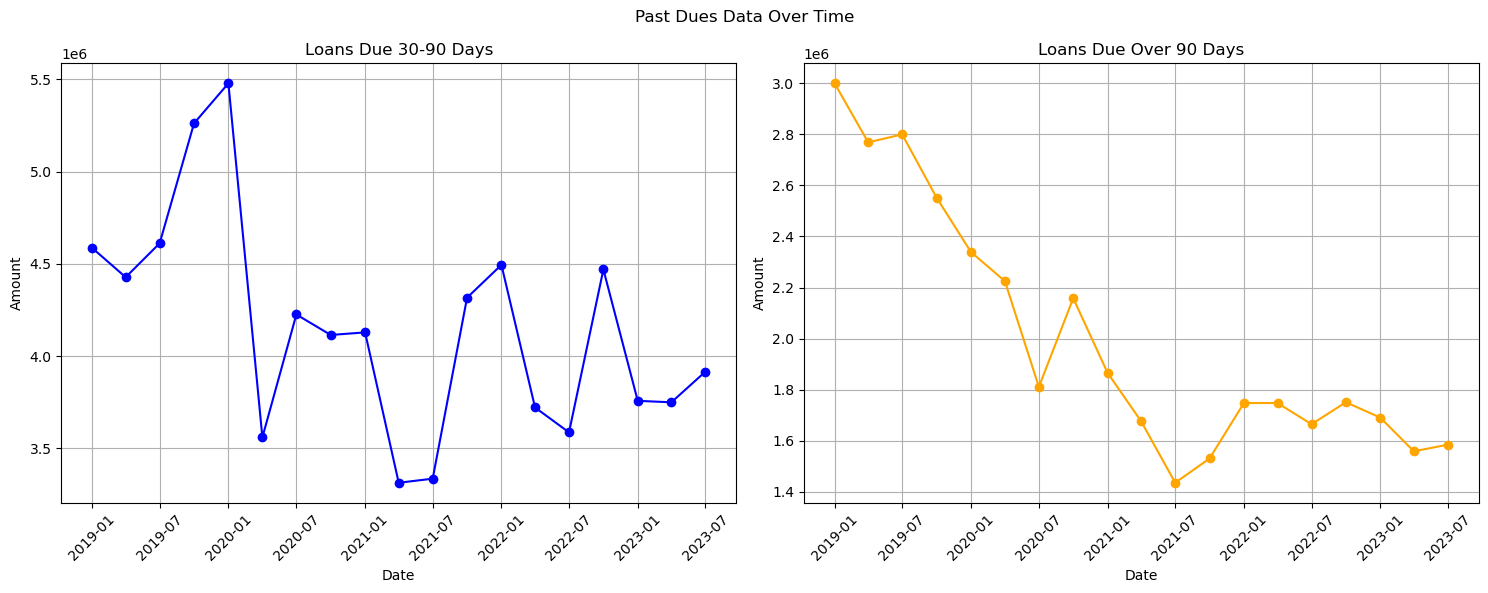

In [14]:
def extract_past_dues_data():
    df = pd.DataFrame(columns=['date', 'Loans_Due_30_90_days', 'Loans_due_over_90_days'])
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            if year == 2023 and quarter > 3:
                continue

            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                date_object = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)
                loans_due_30_90_days = data[data['ItemName'] == 'BHCK1406']['Value'].iloc[0]
                loans_due_over_90_days = data[data['ItemName'] == 'BHCK1407']['Value'].iloc[0]

                row = {'date': date_object, 'Loans_Due_30_90_days': loans_due_30_90_days, 'Loans_due_over_90_days': loans_due_over_90_days}
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item codes not found in file {file_name}. Skipping to the next file.")
                
    return df

past_dues_data = extract_past_dues_data()

def plot_past_dues_data(df):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Past Dues Data Over Time')

    axs[0].plot(df['date'], df['Loans_Due_30_90_days'], marker='o', color='blue')
    axs[0].set_title('Loans Due 30-90 Days')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Amount')
    axs[0].grid(True)
    axs[0].tick_params(axis='x', rotation=45)

    axs[1].plot(df['date'], df['Loans_due_over_90_days'], marker='o', color='orange')
    axs[1].set_title('Loans Due Over 90 Days')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Amount')
    axs[1].grid(True)
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_past_dues_data(past_dues_data)


### Loans Due 30-90 Days
- **Loans Due 30-90 Days**: This column represents the amount of loans that are past due but not yet over 90 days. These figures are crucial as they signal early-stage delinquencies. An increase in these numbers could indicate a potential rise in credit risk and may reflect economic conditions affecting borrowers' ability to pay. Monitoring trends in these figures helps BOFA in assessing the quality of its loan portfolio and in making provisions for potential loan losses.

### Loans Due Over 90 Days
- **Loans Due Over 90 Days**: This column shows loans that are significantly past due, marking a more serious level of delinquency. Persistent increases in this category could be a red flag, pointing to deteriorating asset quality and higher credit risk.


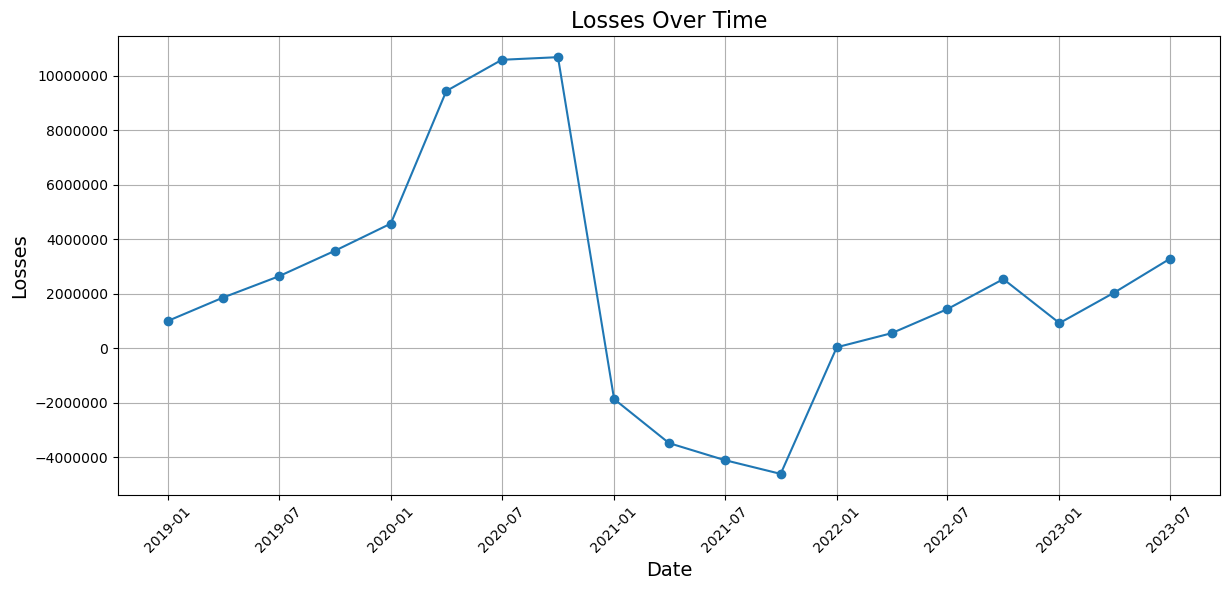

In [2]:
def extract_losses_data(loan_losses_code):
    df = pd.DataFrame(columns=['date', 'losses'])
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            # Handling the case where the quarter and year combination doesn't exist
            if year == 2023 and quarter > 3:
                continue

            # Constructing file name based on quarter and year
            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                loan_loss_value = data[data['ItemName'] == loan_losses_code]['Value'].iloc[0]
                
                # Assuming month is the first month of the quarter
                month = (quarter - 1) * 3 + 1
                date_object = pd.Timestamp(year=year, month=month, day=1)

                data_to_insert_df = pd.DataFrame({'date': [date_object], 'losses': [loan_loss_value]})
                df = pd.concat([df, data_to_insert_df], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item code {loan_losses_code} not found in file {file_name}. Skipping to the next file.")
                
    return df

# Example usage for loan losses
loan_losses_code = 'BHCKJJ33'
losses = extract_losses_data(loan_losses_code)

plot_data(losses, "Losses")

## BOFA Losses Analysis

### Basic Statistics
- **Count:** 19
- **Mean Losses:** $2,165,211
- **Standard Deviation:** $4,404,791
- **Minimum Losses:** -$4,604,000 (gain)
- **25th Percentile:** $297,500
- **Median Losses:** $1,861,000
- **75th Percentile:** $3,429,000
- **Maximum Losses:** $10,677,000

### Quarterly Trend Analysis
- Significant fluctuation in losses over quarters.
- Example: Increase to over $10,677,000 in 2020Q4.
- Negative losses (gains) in all quarters of 2021.

### Yearly Trend Analysis
- Highest losses in 2020: $35,269,000.
- Total gain in 2021: -$14,037,000.
- Return to losses in 2022 and 2023, lower than 2020 peak.


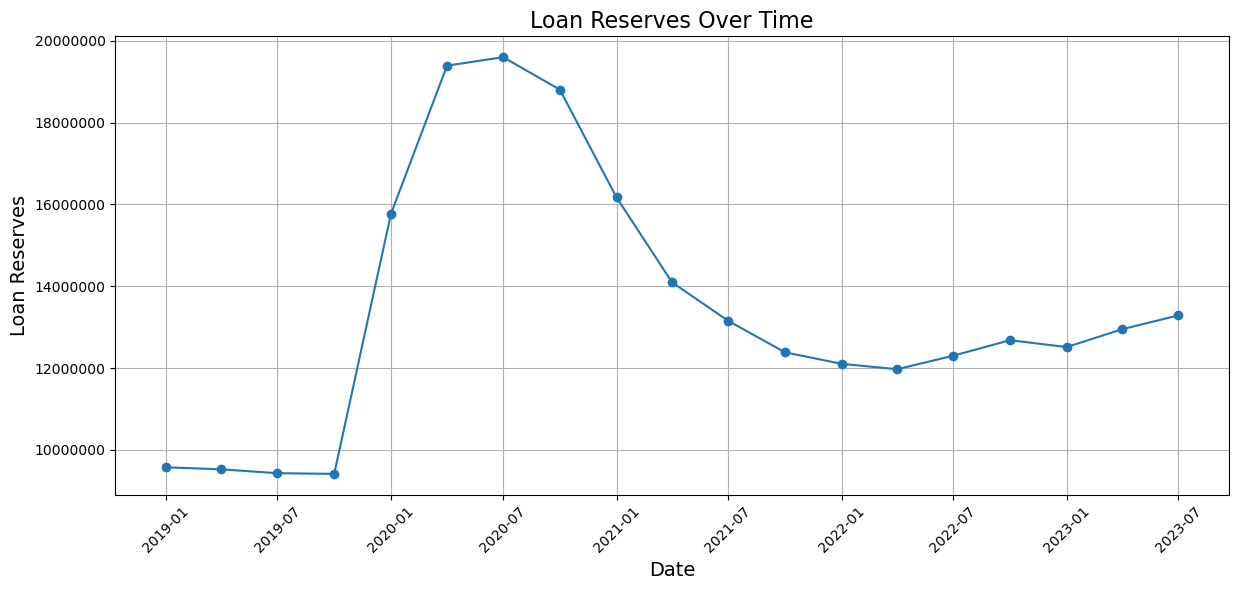

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extract_loan_res_data(item_code):
    df = pd.DataFrame(columns=['date', 'loan_reserves'])
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            # Handling the case where the quarter and year combination doesn't exist
            if year == 2023 and quarter > 3:
                continue

            # Constructing file name based on quarter and year
            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                loan_reserves_value = data[data['ItemName'] == item_code]['Value'].iloc[0]
                
                # Assuming month is the first month of the quarter
                month = (quarter - 1) * 3 + 1
                date_object = pd.Timestamp(year=year, month=month, day=1)

                data_to_insert_df = pd.DataFrame({'date': [date_object], 'loan_reserves': [loan_reserves_value]})
                df = pd.concat([df, data_to_insert_df], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
                
    return df

# Example usage for loan reserves
loan_reserves = extract_loan_res_data('BHCK3123')
plot_data(loan_reserves, "Loan Reserves")

## BOFA Loan Reserves Analysis

### Basic Statistics
- **Count:** 19
- **Mean Loan Reserves:** $13,427,530
- **Standard Deviation:** $3,213,832
- **Minimum Loan Reserves:** $9,416,000
- **25th Percentile:** $12,038,500
- **Median Loan Reserves:** $12,682,000
- **75th Percentile:** $14,930,500
- **Maximum Loan Reserves:** $19,596,000

### Quarterly Trend Analysis
- Significant increase in 2020, with a peak in Q3.
- Gradual decrease in loan reserves post-2020.
- Slight uptick in reserves in 2023.

### Yearly Trend Analysis
- Peak in 2020: $73,553,000.
- Gradual decline to $55,805,000 in 2021 and $49,061,000 in 2022.
- Continuing trend of reduced reserves in 2023 compared to 2020 peak.


Data for item codes not found in file data/Q1-2019.csv. Skipping to the next file.
Data for item codes not found in file data/Q2-2019.csv. Skipping to the next file.
Data for item codes not found in file data/Q3-2019.csv. Skipping to the next file.
Data for item codes not found in file data/Q4-2019.csv. Skipping to the next file.
Data for item codes not found in file data/Q1-2020.csv. Skipping to the next file.
Data for item codes not found in file data/Q2-2020.csv. Skipping to the next file.
Data for item codes not found in file data/Q3-2020.csv. Skipping to the next file.
Data for item codes not found in file data/Q4-2020.csv. Skipping to the next file.
Data for item codes not found in file data/Q1-2021.csv. Skipping to the next file.


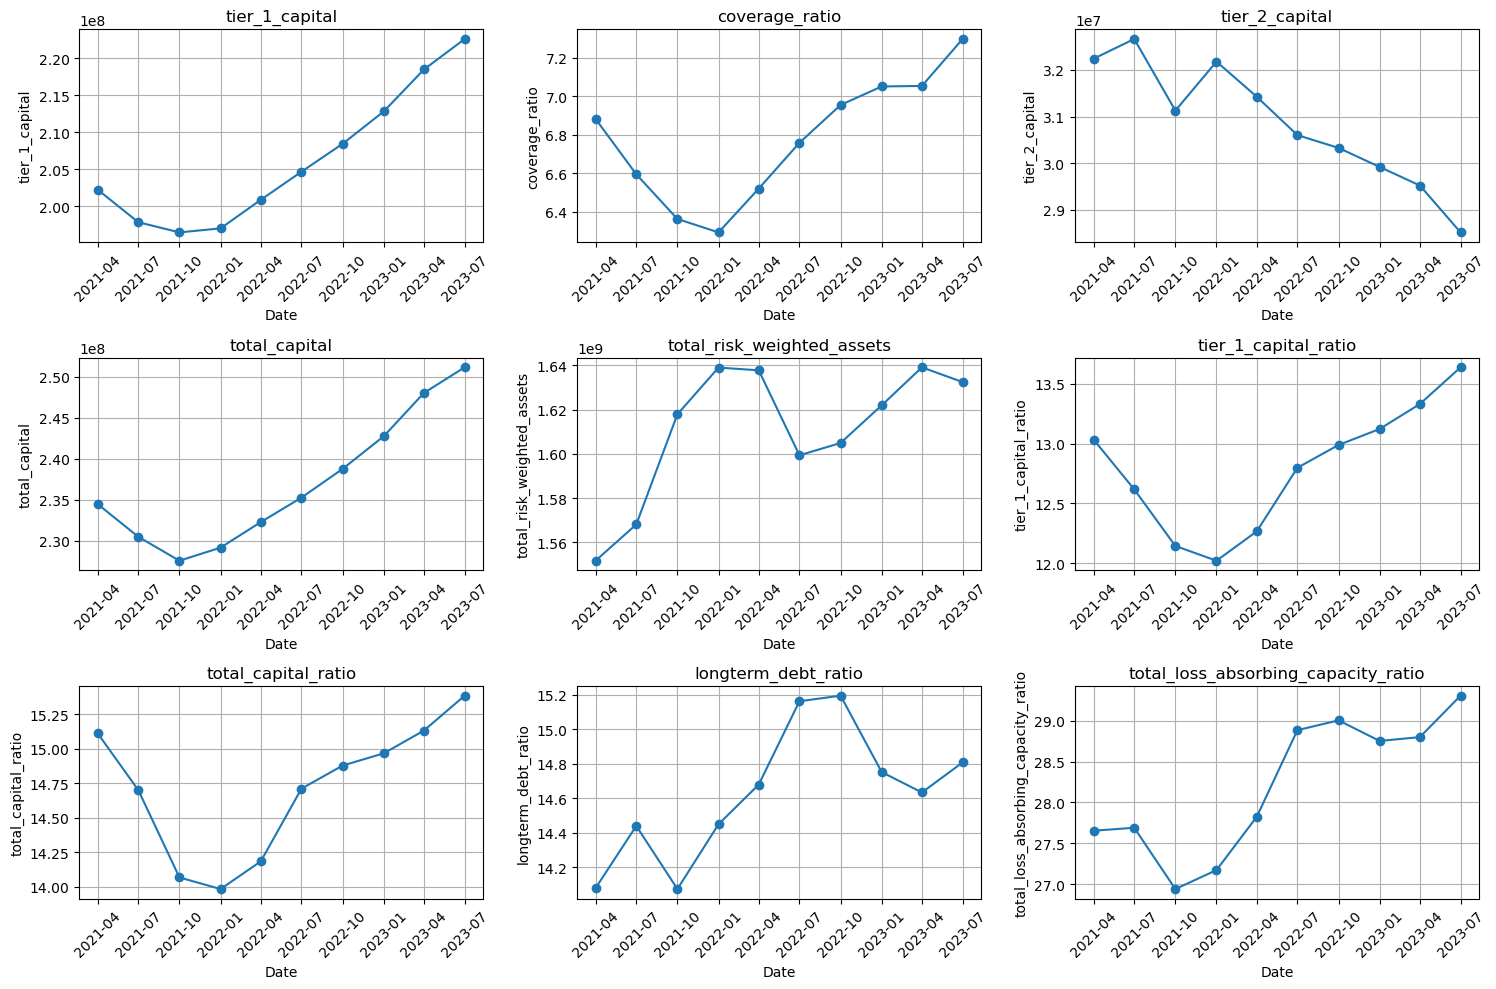

In [4]:
def extract_ratios_data(item_codes):
    df = pd.DataFrame(columns=['date'] + list(item_codes.keys()))
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            # Handling the case where the quarter and year combination doesn't exist
            if year == 2023 and quarter > 3:
                continue

            # Constructing file name based on quarter and year
            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                row_data = {'date': pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)}
                for ratio_name, item_code in item_codes.items():
                    ratio_value = data[data['ItemName'] == item_code]['Value'].iloc[0]
                    row_data[ratio_name] = ratio_value

                # Creating a DataFrame for the current row and concatenating it
                current_row_df = pd.DataFrame([row_data])
                df = pd.concat([df, current_row_df], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item codes not found in file {file_name}. Skipping to the next file.")
                
    return df

# Example usage for ratios
item_codes = {
    'tier_1_capital': 'BHCA8274',
    'coverage_ratio': 'BHCA7204',
    'tier_2_capital': 'BHCA5311',
    'total_capital': 'BHCA3792',
    'total_risk_weighted_assets': 'BHCAA223',
    'tier_1_capital_ratio': 'BHCA7206',
    'total_capital_ratio': 'BHCA7205',
    'longterm_debt_ratio': 'BHCALF23',
    'total_loss_absorbing_capacity_ratio': 'BHCWLF23'
}
ratios = extract_ratios_data(item_codes)

def plot_ratios(df):
    # Define the number of rows and columns for subplots
    n_rows = 3
    n_cols = 3

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each variable (excluding 'date') and create a subplot
    for i, column in enumerate(df.columns[1:]):  # Skipping the 'date' column
        ax = axes[i]
        ax.plot(df['date'], df[column], marker='o')
        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_ratios(ratios)

### Tier 1 Capital, Tier 2 Capital, and Total Capital
- **Tier 1 Capital**: Represents the core capital of the bank, including equity capital and disclosed reserves.
- **Tier 2 Capital**: Consists of supplementary capital like revaluation reserves, hybrid instruments, and subordinated term debt.
- **Total Capital**: The sum of Tier 1 and Tier 2 capital, providing an overall view of the bank's capital strength and regulatory compliance.

### Coverage Ratio, Total Risk-Weighted Assets, and Long-Term Debt Ratio
- **Coverage Ratio**: Indicates the bank's ability to cover certain liabilities or risks.
- **Total Risk-Weighted Assets**: Used in determining the minimum capital requirements based on a risk assessment of the bank's assets.
- **Long-Term Debt Ratio**: Shows the proportion of long-term debt in the bank's capital structure, offering insights into its financing strategy and stability.

### Tier 1 Capital Ratio, Total Capital Ratio, and Total Loss Absorbing Capacity Ratio
- **Tier 1 Capital Ratio**: Compares the core capital against the total risk-weighted assets, reflecting the bank's financial health and resilience to financial stress.
- **Total Capital Ratio**: Includes both Tier 1 and Tier 2 capital, giving a broader perspective of the bank's capital adequacy.
- **Total Loss Absorbing Capacity Ratio**: Measures the bank's capacity to absorb losses, crucial for its resilience in adverse financial conditions.


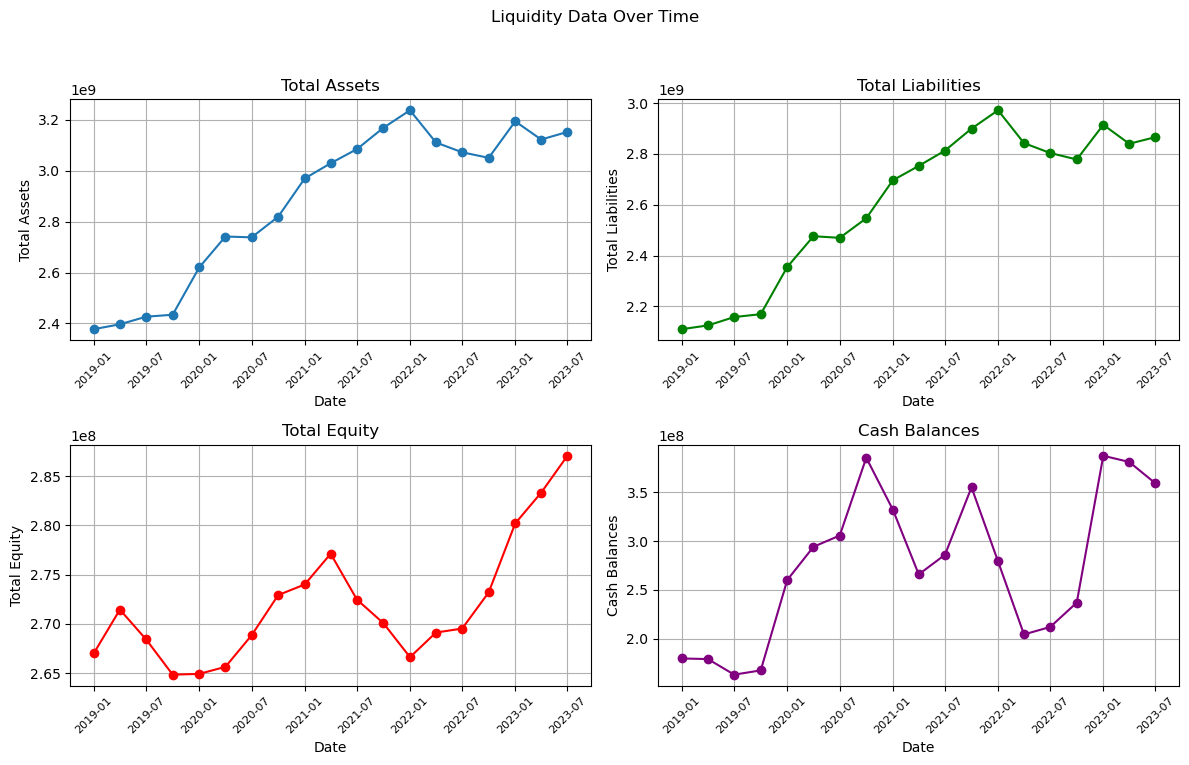

In [5]:
def extract_liquidity_data():
    df = pd.DataFrame(columns=['date', 'Total_assets', 'Total_liabilities', 'Total_equity', 'Cash_balances'])
    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            if year == 2023 and quarter > 3:
                continue

            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                date_object = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)
                total_assets = data[data['ItemName'] == 'BHCK2170']['Value'].iloc[0]
                total_liabilities = data[data['ItemName'] == 'BHCK2948']['Value'].iloc[0]
                total_equity = data[data['ItemName'] == 'BHCKG105']['Value'].iloc[0]
                cash_balances = data[data['ItemName'].isin(['BHCK0081', 'BHCK0395', 'BHCK0397'])]['Value'].sum()

                row = {'date': date_object, 'Total_assets': total_assets, 'Total_liabilities': total_liabilities,
                       'Total_equity': total_equity, 'Cash_balances': cash_balances}
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item codes not found in file {file_name}. Skipping to the next file.")
                
    return df

# Example usage
liquidity_data = extract_liquidity_data()


def plot_liquidity_data(df):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Liquidity Data Over Time')

    for ax in axs.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_fontsize(8)

    axs[0, 0].plot(df['date'], df['Total_assets'], marker='o')
    axs[0, 0].set_title('Total Assets')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Total Assets')
    axs[0, 0].grid(True)

    axs[0, 1].plot(df['date'], df['Total_liabilities'], marker='o', color='green')
    axs[0, 1].set_title('Total Liabilities')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Total Liabilities')
    axs[0, 1].grid(True)

    axs[1, 0].plot(df['date'], df['Total_equity'], marker='o', color='red')
    axs[1, 0].set_title('Total Equity')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Total Equity')
    axs[1, 0].grid(True)

    axs[1, 1].plot(df['date'], df['Cash_balances'], marker='o', color='purple')
    axs[1, 1].set_title('Cash Balances')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Cash Balances')
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot the data
plot_liquidity_data(liquidity_data)


### Total Assets
Total Assets represent the sum of all assets owned by the entity. This includes cash, investments, property, and any other resources that have economic value. High total assets can indicate a strong financial position, but it's also important to consider the quality and liquidity of these assets. An increase in total assets over time typically suggests growth and financial stability.

### Total Liabilities
Total Liabilities represent the obligations the entity owes to external parties, including loans, accounts payable, and other debts. High liabilities can indicate a heavy debt burden, which might be a concern if not balanced by sufficient assets or revenue streams. Monitoring changes in total liabilities helps in assessing the entity's financial risk and leverage levels.

### Total Equity and Cash Balances
- **Total Equity**: This is the residual interest in the assets of the entity after deducting liabilities. It represents the owner's claim on the business assets and is a key indicator of financial health. Rising equity can suggest profitable operations and sound financial management.
- **Cash Balances**: Cash balances reflect the liquidity of the entity and its ability to meet short-term obligations. A healthy cash balance is crucial for operational stability, but excessively high cash might indicate underutilization of resources which could be invested for higher returns.


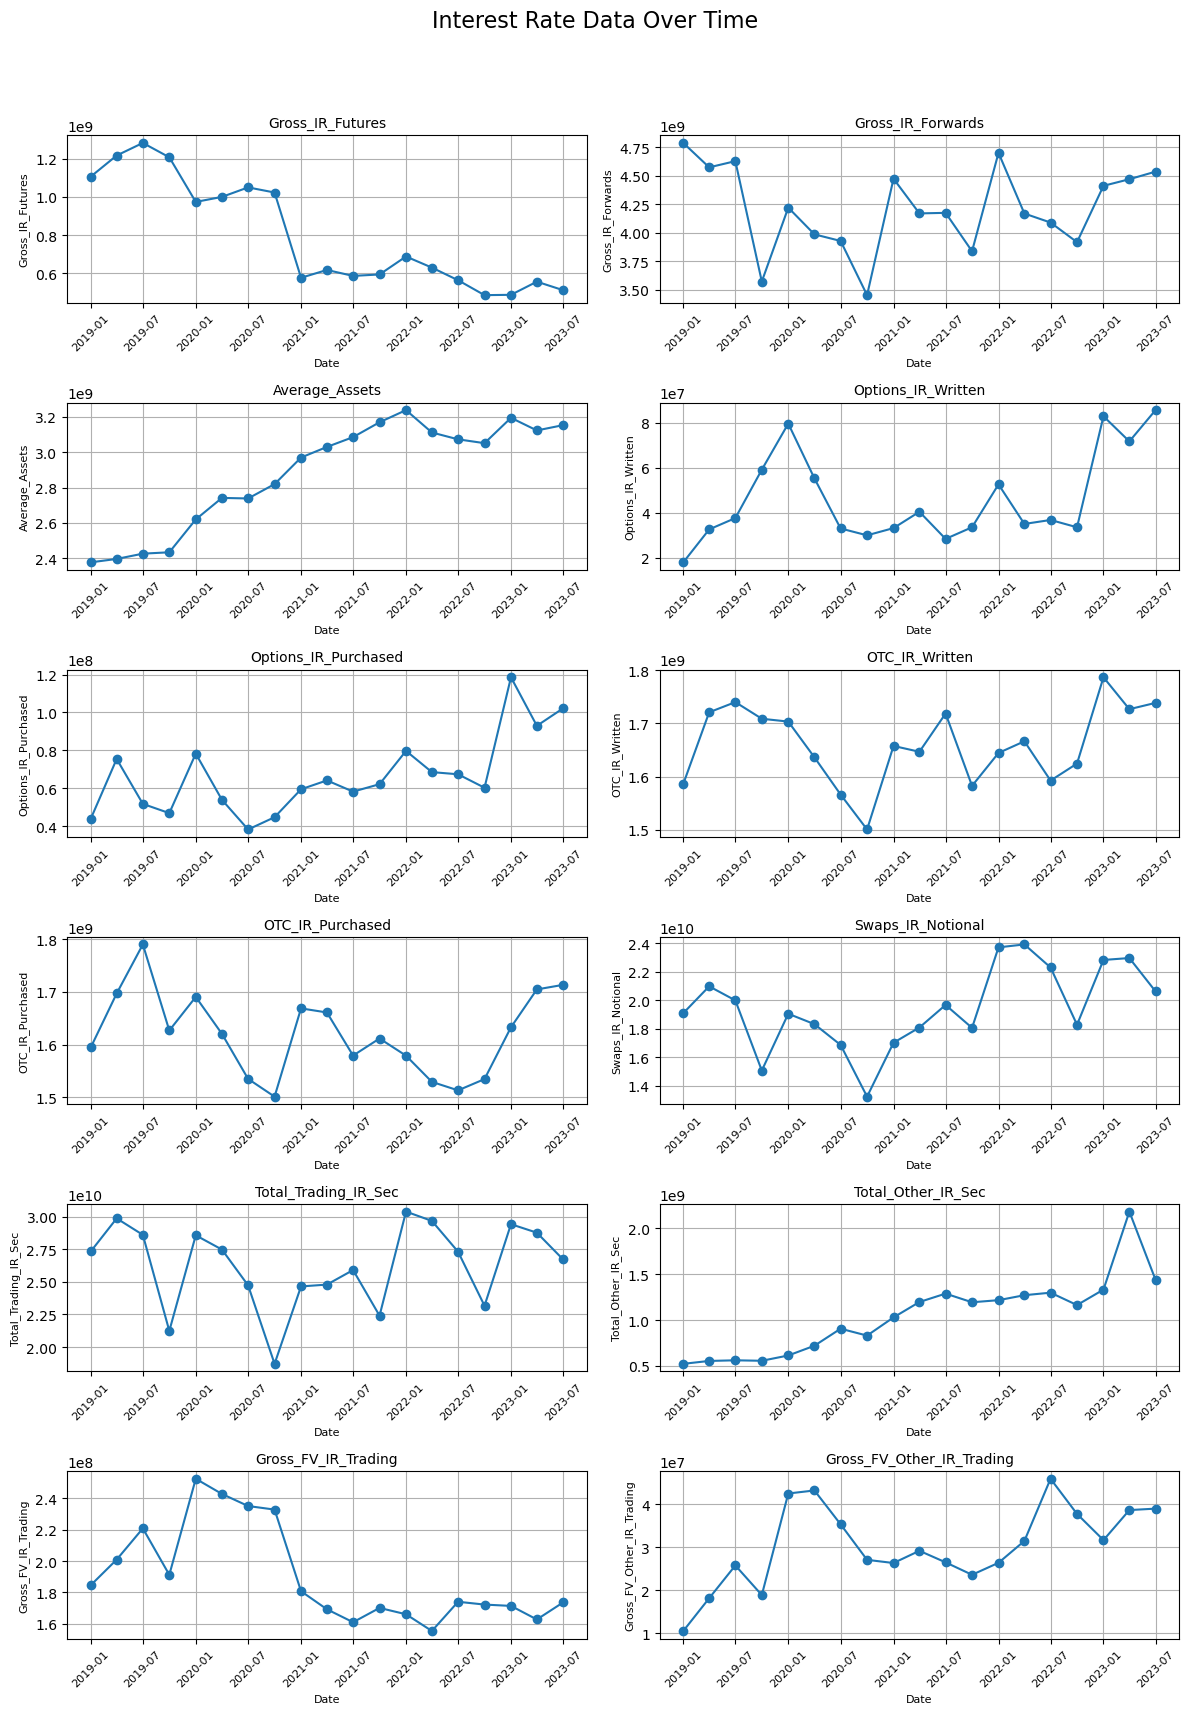

In [6]:
def extract_interest_rate_data():
    df = pd.DataFrame(columns=[
        'date', 'Gross_IR_Futures', 'Gross_IR_Forwards', 'Average_Assets', 'Options_IR_Written', 
        'Options_IR_Purchased', 'OTC_IR_Written', 'OTC_IR_Purchased', 'Swaps_IR_Notional', 
        'Total_Trading_IR_Sec', 'Total_Other_IR_Sec', 'Gross_FV_IR_Trading', 'Gross_FV_Other_IR_Trading'
    ])

    for year in range(2019, 2024):  # Assuming you have data from 2019 to 2023
        for quarter in range(1, 5):
            if year == 2023 and quarter > 3:
                continue

            file_name = f'data/Q{quarter}-{year}.csv'

            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                date_object = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)
                item_codes = {
                    'Gross_IR_Futures': 'BHCK8693',
                    'Gross_IR_Forwards': 'BHCK8698',
                    'Average_Assets': 'BHCT2170',
                    'Options_IR_Written': 'BHCK8701',
                    'Options_IR_Purchased': 'BHCK8705',
                    'OTC_IR_Written': 'BHCK8709',
                    'OTC_IR_Purchased': 'BHCK8713',
                    'Swaps_IR_Notional': 'BHCK3450',
                    'Total_Trading_IR_Sec': 'BHCKA126',
                    'Total_Other_IR_Sec': 'BHCK8725',
                    'Gross_FV_IR_Trading': 'BHCK8733',
                    'Gross_FV_Other_IR_Trading': 'BHCK8741'
                }

                row = {'date': date_object}
                for key, code in item_codes.items():
                    if code in data['ItemName'].values:
                        row[key] = data[data['ItemName'] == code]['Value'].iloc[0]

                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
            except IndexError:
                print(f"Data for item codes not found in file {file_name}. Skipping to the next file.")

    return df

# Example usage
interest_rate_data = extract_interest_rate_data()

def plot_interest_rate_data(df):
    fig, axs = plt.subplots(6, 2, figsize=(12, 18))
    fig.suptitle('Interest Rate Data Over Time', fontsize=16)

    for i, ax in enumerate(axs.flat):
        if i >= len(df.columns) - 1: 
            ax.axis('off')
            continue

        column = df.columns[i + 1]  
        ax.plot(df['date'], df[column], marker='o')
        ax.set_title(column, fontsize=10)
        ax.set_xlabel('Date', fontsize=8)
        ax.set_ylabel(column, fontsize=8)
        ax.grid(True)
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_fontsize(8)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_interest_rate_data(interest_rate_data)



**Interest Rate Futures and Forwards:** The bank holds significant positions in both interest rate futures and forwards. These instruments allow the bank to lock in future interest rates, thereby hedging against the risk of adverse movements in interest rates. For instance, if the bank expects interest rates to rise, it might enter into a futures contract to borrow at a fixed rate. This way, if rates do rise, the bank is protected against higher borrowing costs. Conversely, if rates fall, the bank might face opportunity costs, but its primary exposure to rising rates is hedged.

**Options and OTC Derivatives:** The bank's positions in options (both written and purchased) and over-the-counter (OTC) derivatives (both written and purchased) provide a more complex layer of hedging. Options give the bank the right, but not the obligation, to engage in an interest rate transaction, adding flexibility to their risk management strategy. OTC derivatives, which are tailored to the bank’s specific needs, can be used to hedge specific risks that might not be covered by standardized products like futures and forwards. These instruments can be designed to be sensitive to a range of outcomes, offering a more nuanced hedge against interest rate fluctuations.

**Swaps and Trading Securities:** Interest rate swaps, where the bank might agree to exchange fixed-rate payments for floating-rate payments (or vice versa), can significantly alter its interest rate exposure. This is particularly useful if the bank's assets and liabilities are mismatched in terms of fixed and floating rates. Additionally, the bank's trading in interest rate securities might be part of a dynamic hedging strategy where positions are frequently adjusted based on changing market conditions. However, these activities can also introduce their own risks and might require sophisticated risk management to ensure the bank's overall exposure is aligned with its risk appetite.

In summary, the bank's use of various interest rate derivatives suggests a proactive approach to managing interest rate risk. However, the effectiveness of these hedges and the bank's overall sensitivity to interest rate fluctuations would depend on factors like the size of these positions relative to its assets, the nature of its underlying exposures, and the dynamics of the interest rate environment. Moreover, while derivatives can be effective hedges, they can also introduce complexity and potential for misjudgment, especially in volatile or unpredictable interest rate environments.


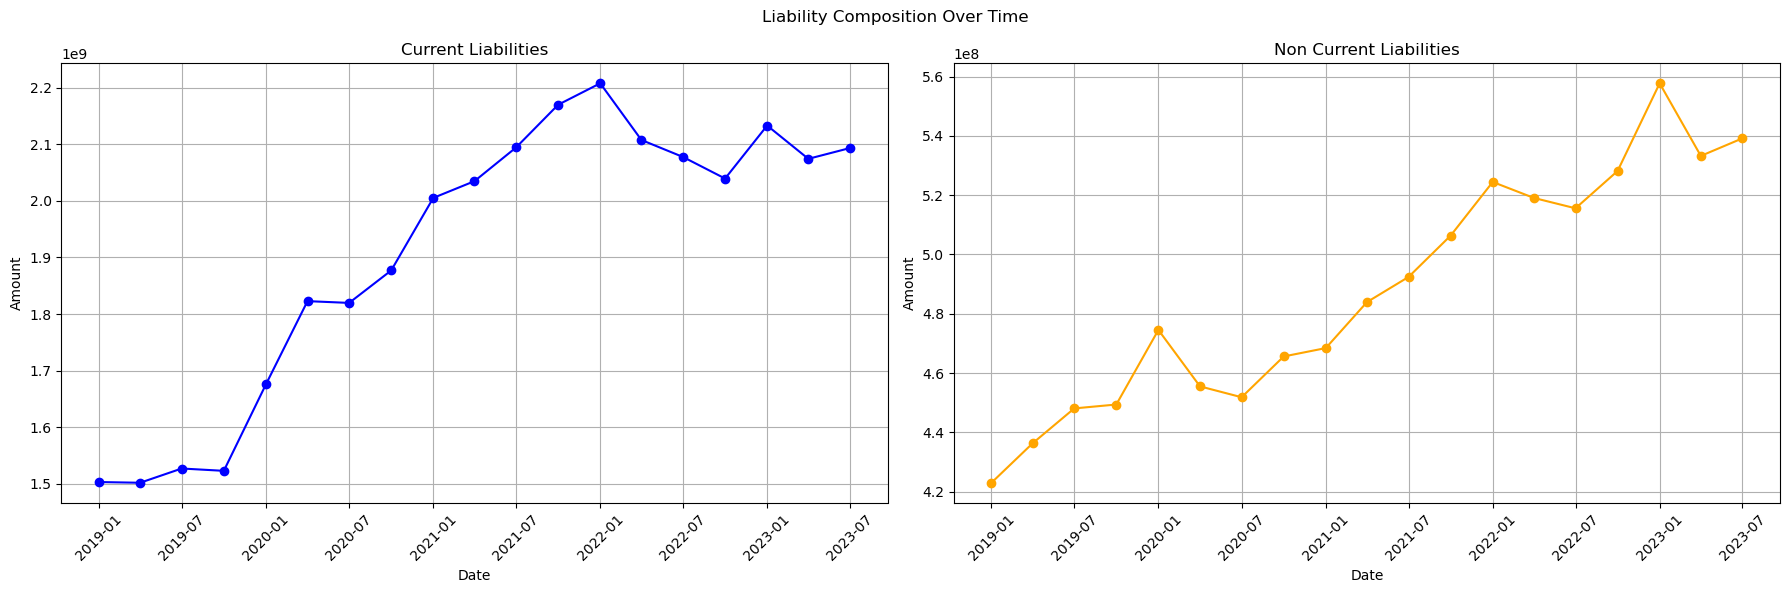

In [7]:
def extract_liability_composition_data():
    df = pd.DataFrame(columns=['date', 'Current Liabilities', 'Non Current Liabilities'])
    for year in range(2019, 2024):  # Assuming data from 2019 to 2023
        for quarter in range(1, 5):
            if year == 2023 and quarter > 3:
                continue

            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                date_object = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)

                current_liabilities_codes = ['BHDM6631', 'BHDM6636', 'BHFN6631', 'BHDMB993', 'BHCKB995', 'BHDM3548']
                non_current_liabilities_codes = ['BHCK3190', 'BHCK4062', 'BHCKC699', 'BHCK2750']

                current_liabilities = data[data['ItemName'].isin(current_liabilities_codes)]['Value'].sum()
                non_current_liabilities = data[data['ItemName'].isin(non_current_liabilities_codes)]['Value'].sum()

                row = {
                    'date': date_object, 
                    'Current Liabilities': current_liabilities, 
                    'Non Current Liabilities': non_current_liabilities
                }
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
                
    return df

liability_composition = extract_liability_composition_data()

def plot_liability_composition(df):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Liability Composition Over Time')

    axs[0].plot(df['date'], df['Current Liabilities'], marker='o', color='blue')
    axs[0].set_title('Current Liabilities')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Amount')
    axs[0].grid(True)
    axs[0].tick_params(axis='x', rotation=45)

    axs[1].plot(df['date'], df['Non Current Liabilities'], marker='o', color='orange')
    axs[1].set_title('Non Current Liabilities')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Amount')
    axs[1].grid(True)
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot the data
plot_liability_composition(liability_composition)

In [8]:
liability_composition.to_csv("liability_composition.csv", index = False)

### Current Liabilities
- **Current Liabilities** reflect the financial obligations that BOFA is due to settle within one year. This typically includes short-term borrowings, accounts payable, and other similar liabilities. A steady increase or a high level of current liabilities might indicate a greater reliance on short-term funding or could reflect seasonal fluctuations in BOFA's operations. It's important to compare these figures with the company's liquid assets to assess its short-term financial health and liquidity risk.

### Non-Current Liabilities
- **Non-Current Liabilities** represent the obligations that extend beyond one year. This could include long-term debt, pension liabilities, and deferred tax liabilities, among others. Non-current liabilities provide insights into the long-term financial strategy of BOFA, such as its leverage and funding structure. An increasing trend in non-current liabilities could suggest that the company is taking on more long-term debt, which might increase its financial risk if not managed properly.

### Overall Liability Structure
- The balance between **Current** and **Non-Current Liabilities** is crucial for understanding BOFA's overall liability structure and financial stability. A healthy balance between short-term and long-term obligations is indicative of sound financial management. However, an imbalance, such as a disproportionately high level of short-term liabilities compared to long-term ones, may signal potential liquidity issues or a misalignment in the company's financial strategy with its operational needs.


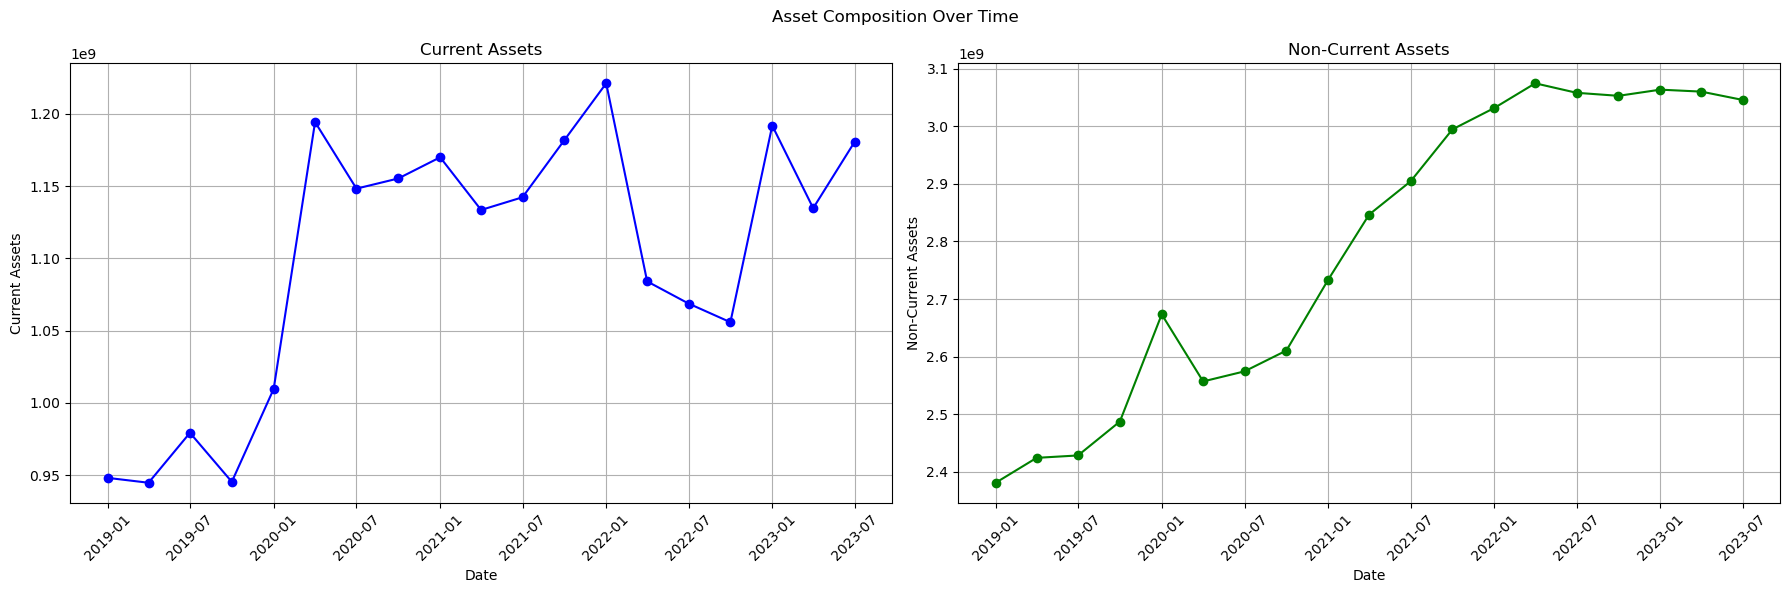

In [10]:
def extract_asset_composition_data():
    df = pd.DataFrame(columns=['date', 'Current_Assets', 'Non_Current_Assets'])
    current_assets_codes = [
        'BHCK6081', 'BHCK0395', 'BHCK0397', 'BHCK1773', 'BHCKJA22', 'BHCKB987', 'BHCKB989', 'BHCK5369', 'BHCK3545', 'BHDMB987'
    ]
    non_current_assets_codes = [
        'BHCKJJ34', 'BHCK3123', 'BHCKB528', 'BHCKB529', 'BHCK2145', 'BHCK2150', 'BHCK2130', 'BHCK3656', 'BHCK2143', 'BHCK2160'
    ]

    for year in range(2019, 2024):
        for quarter in range(1, 5):
            if year == 2023 and quarter > 3:
                continue

            file_name = f'data/Q{quarter}-{year}.csv'
            
            try:
                data = pd.read_csv(file_name)
                data['ItemName'] = data['ItemName'].astype(str)
                data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

                date_object = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)

                current_assets = data[data['ItemName'].isin(current_assets_codes)]['Value'].sum()
                non_current_assets = data[data['ItemName'].isin(non_current_assets_codes)]['Value'].sum()

                row = {'date': date_object, 'Current_Assets': current_assets, 'Non_Current_Assets': non_current_assets}
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
            except FileNotFoundError:
                print(f"File {file_name} not found. Skipping to the next file.")
                
    return df

# Example usage
asset_composition = extract_asset_composition_data()


def plot_asset_composition(df):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Asset Composition Over Time')

    axs[0].plot(df['date'], df['Current_Assets'], marker='o', color='blue')
    axs[0].set_title('Current Assets')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Current Assets')
    axs[0].grid(True)
    axs[0].tick_params(axis='x', rotation=45)

    axs[1].plot(df['date'], df['Non_Current_Assets'], marker='o', color='green')
    axs[1].set_title('Non-Current Assets')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Non-Current Assets')
    axs[1].grid(True)
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_asset_composition(asset_composition)




### Current Assets
- **Current Assets** represent the resources that are expected to be realized in cash or used up within one year. This typically includes cash and cash equivalents, short-term investments, accounts receivable, and inventory. A rise in current assets could indicate an increase in liquid resources, potentially improving BOFA's short-term financial flexibility. However, a significant portion of these assets being tied up in less liquid forms like inventory or receivables could signal potential liquidity risks.

### Non-Current Assets
- **Non-Current Assets** are long-term investments or resources that are not expected to be converted into cash within the upcoming year. This often includes property, plant and equipment, long-term investments, and intangible assets like goodwill and patents. The growth of non-current assets can be indicative of BOFA's long-term investment strategies and expansion plans. However, it's important to assess the quality and productivity of these assets to ensure they contribute positively to the company's value and future income streams.

### Overall Asset Structure
- Analyzing the balance between **Current Assets** and **Non-Current Assets** is crucial for understanding BOFA's overall financial health and operational strategy. A well-balanced asset composition, with a healthy mix of current and non-current assets, suggests a stable financial position with both short-term liquidity and long-term growth potential. An imbalance, such as a high proportion of non-current assets, could indicate a more long-term strategic focus but might also pose liquidity challenges in the short term.


## Section 6

**3\. Based on MD&A discussion,**

**1. ****Is there a Asset Liability Committee (ALCO)? Describe the framework that the bank is using for Asset Liability Management (ALM) within the bank.**

Yes, there is an Asset Liability Committee (ALCO) within the bank. The Asset Liability Committee (ALCO) of the bank plays a pivotal role in overseeing Asset Liability Management (ALM) and interest rate risk management. This committee, operating under the Finance Committee, is essential in managing the bank's interest rate sensitivity, ensuring that fluctuations in interest rates do not significantly impact the bank's earnings and capital adversely.

A crucial aspect of the ALCO's function is its involvement in the management accounting and reporting process, which includes deriving segment and business results through specific allocation methodologies for revenue and expense. The net income for the businesses is calculated based on these allocations, using an activity-based costing model, funds transfer pricing, and other managerial methodologies and assumptions.

ALCO's oversight extends to the Corporation's ALM activities, which encompass a comprehensive interest rate risk management strategy. This strategy involves using a variety of derivatives and cash instruments to mitigate the impact of interest rate volatility on earnings and capital. The outcomes of the Corporation's ALM activities, which are integral to this strategy, are allocated to the business segments. These allocations vary with the performance of the ALM activities.

Furthermore, ALCO influences external product pricing decisions, including deposit pricing strategies. It also oversees the effects of the Corporation's internal funds transfer pricing process. The net effects of these ALM activities, under ALCO's guidance, play a significant role in the financial health and stability of the bank.

**2. ****Interest Rate Risk**

- **How is the bank measuring and managing interest rate risk for ALM?**

Interest rate risk represents exposures to instruments whose values vary with the level or volatility of interest rates.

These instruments include, but are not limited to, loans, debt securities, certain trading-related assets and liabilities, deposits, borrowings, and derivatives. Hedging instruments used to mitigate these risks include derivatives such as options, futures, forwards, and swaps.

 I. Interest Rate Risk Management (Trading Activities)

The bank's strategy for managing interest rate risk within its Asset Liability Management (ALM) operations is comprehensive and dynamic. It involves a vigilant analysis of how its financial positions are affected by different market risk elements. Central to this analysis is the evaluation of the bank's revenue sensitivity to minute variations in interest rates, specifically pinpointing the effects of a one basis point movement, known as the present value of a basis point (PV01). PV01 represents a direct derivation of the net present value's sensitivity to interest rate alterations.

In addition to this sensitivity analysis, the bank utilizes advanced statistical methods to evaluate risk. These methods encompass both real and hypothetical market conditions, using tools like Value at Risk (VaR) and comprehensive stress testing. Such measures provide a nuanced understanding of the risks associated with interest rate fluctuations under a range of market scenarios.

Complementing these techniques, risk managers independently review the risk profiles of the bank's portfolios. They consider both the existing market conditions and potential future market dynamics. This independent assessment is crucial in ensuring a robust and forward-looking approach to managing interest rate risk, thereby supporting the bank's overall ALM strategy and maintaining its financial resilience.

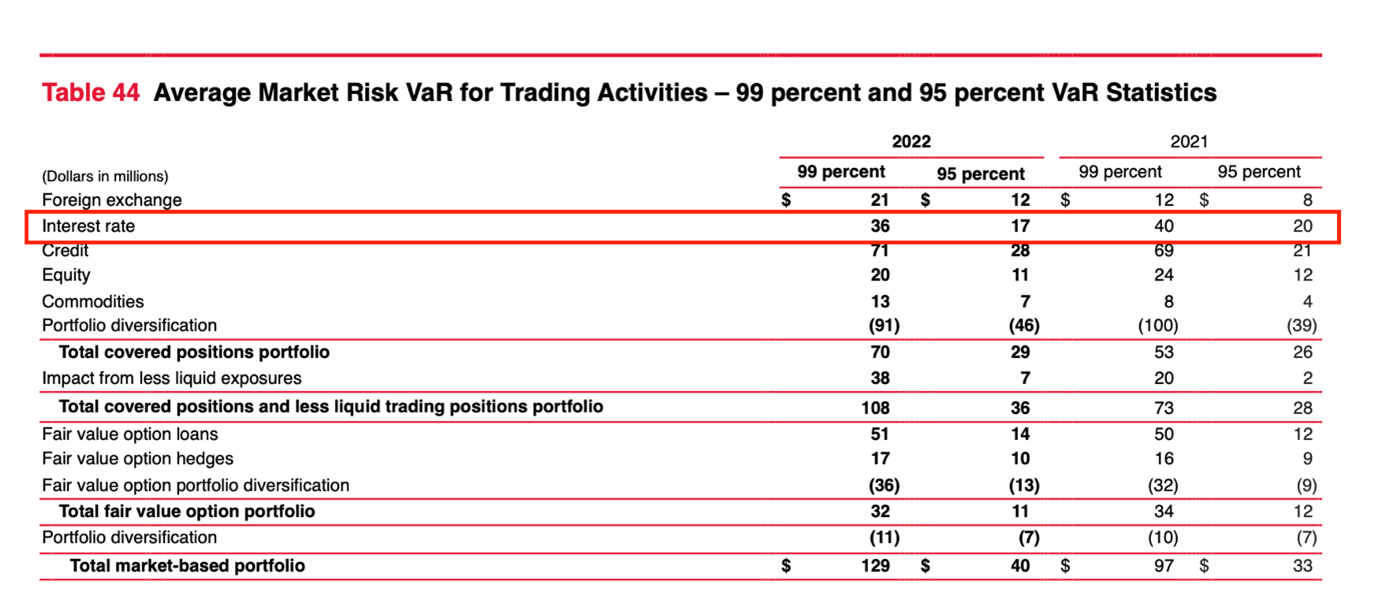

In [7]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'var.png'

# Displaying the image
display(Image(filename=image_path))


I. Interest Rate Risk Management (Banking Book)

Interest rate risk in Banking represents the most significant market risk exposure to their banking book balance sheet. Interest rate risk is measured as the potential change in net interest income caused by movements in market interest rates. Client-facing activities, primarily lending and deposit-taking, create interest rate sensitive positions on their balance sheet.

- **Baseline Forecasting**: The bank starts by creating a baseline forecast of net interest income, which accounts for expected business growth, their current ALM positioning, and anticipated interest rate movements as indicated by market-based forward curves. This forecast serves as a reference point for comparison against alternative scenarios.

- **Sensitivity Analysis**: The bank conducts a sensitivity analysis to assess how different interest rate scenarios would affect the baseline net interest income forecast. This analysis helps to measure the bank's interest rate risk under various conditions.

- **Regular Updates**: The bank frequently updates the net interest income forecast to reflect changing assumptions and differing economic and market conditions. This dynamic approach allows the bank to adjust its strategies in response to new information.

- **Scenario Analysis**: In their scenario analysis, the bank incorporates assumptions about the balance sheet, such as loan and deposit growth, changes in funding mix, product repricing, maturity characteristics, and the amortization of premiums on investment securities.

- **Interest Rate Risk Management**: The bank aims to manage interest rate risk to prevent significant adverse effects on earnings and capital. This involves using financial instruments like securities, residential mortgages, and derivatives (interest rate and foreign exchange) to hedge against interest rate fluctuations.

- **Deposit Portfolio Behavior**: A critical assumption in the bank's projections is the behavior of the deposit portfolio under different interest rate scenarios. The analysis assumes no change in the size or mix of the deposit portfolio from the baseline forecast in alternate rate environments.

- **Non-Reactive Scenario Analysis**: The sensitivity analysis assumes that the bank takes no proactive action in response to rate changes. This means that they're looking at a static picture of interest rate risk without dynamic rebalancing or strategic shifts that might occur in a real-world situation.

- **Exclusion of Correlated Variables**: In their analysis, they do not account for changes in other macroeconomic variables that are normally correlated with changes in interest rates. This helps to isolate the impact of interest rate changes on net interest income.

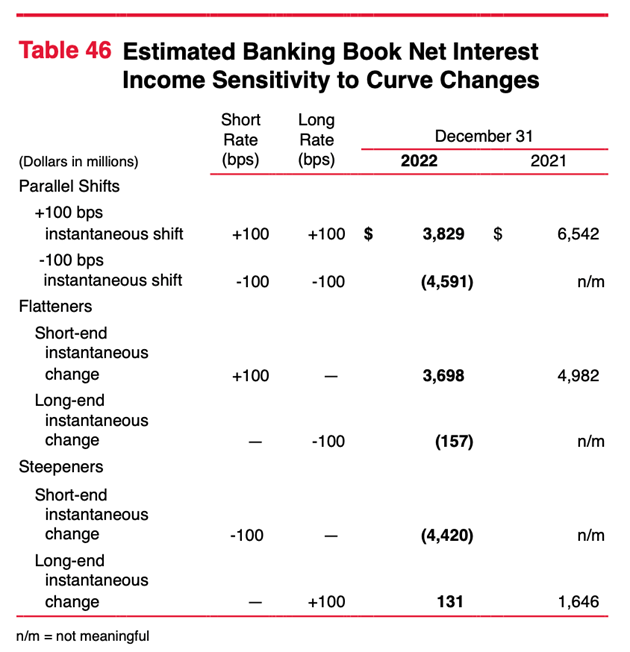

In [8]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'ir.png'

# Displaying the image
display(Image(filename=image_path))


- **Do they discuss duration and convexity in the context of ALM?**

No, duration and convexity are not discussed in the context of ALM.

**4. ****How does the bank discuss Liquidity Risk Management?**

- **What are some tools and metrics that the bank is using for liquidity risk management?**

Objective:

The Bank of America's primary objective in managing liquidity risk is to ensure the institution can adequately meet both anticipated and unanticipated financial demands. This encompasses a variety of obligations, from long-term debt settlements to customer deposit withdrawals, across a spectrum of economic conditions, all while sustaining its business operations and client support.

Metrics/Methods:

The primary goal in managing liquidity risk is to ensure fulfilling of both expected and unexpected financial obligations. This includes settling long-term debt payments, fulfilling credit commitments, and accommodating customer withdrawals across various economic scenarios, all while supporting their business operations and clientele. To achieve this, they conduct thorough analyses and monitoring of liquidity under both normal and stress-tested conditions. They also maintain a diverse range of funding sources, anchored by robust deposit base, and align risk incentives related to liquidity. These practices have enabled them to navigate effectively through market variations resulting from rising interest rates, inflation, and broader economic shifts.

Committee Governance:

The governance framework for liquidity risk management is underpinned by the Board's approval of the liquidity risk policy and the Financial Contingency and Recovery Plan. The Executive Risk Committee (ERC) sets the bank's liquidity risk tolerance levels, while the Market Risk Committee (MRC) is tasked with overseeing liquidity risks, directing management to maintain exposures within these established tolerance levels. The MRC also reviews the bank's liquidity position, monitors stress testing results, approves liquidity risk limits, and evaluates the impact of strategic decisions on the bank's liquidity profile. These processes are part of a broader risk management strategy, detailed in the "Managing Risk" section of their documentation. Under this governance framework, Bank of America has instituted practices that include maintaining liquidity at the parent company and select subsidiaries, evaluating the appropriate levels of liquidity based on debt maturities and potential outflows under stress conditions, diversifying funding sources in alignment with their asset and legal entity structure, and engaging in thorough contingency planning.

- **Do they discuss deposit convexity after SVB crisis?**

No, this is not discussed in the 10Q or the 10K reports.

**5\. Does the bank discuss how Basel III regulations affect their ALM strategies?**

**Regulatory Capital Requirements:**

- The report discusses regulatory capital requirements in the context of the bank's broker-dealer subsidiaries. It mentions specific net capital requirements that exceed the minimum regulatory requirements, which could be influenced by Basel III regulations. This indicates an awareness and adherence to stringent capital adequacy standards.

**Liquidity Management and Global Liquidity Sources (GLS):**

- The document details the bank's approach to liquidity management, focusing on the composition and management of high-quality, liquid, unencumbered securities. This includes an emphasis on U.S. government and agency securities, as well as other investment-grade securities. The bank's strategy to maintain liquidity, even under stressed conditions, aligns with Basel III's liquidity coverage requirements.

- The report outlines the management of global liquidity sources, demonstrating a comprehensive approach to ensuring sufficient liquidity across different legal entities. This includes considering regulatory, tax, legal, and other restrictions that could impact the transferability of funds.

**Net Stable Funding Ratio (NSFR):**

- A significant mention in the report is the Net Stable Funding Ratio, a liquidity requirement for large banks under Basel III. This ratio is designed to ensure banks maintain a stable funding profile over a one-year period. The report explains how this requirement supports the bank's ability to lend under both normal and adverse economic conditions.

While the 10-K does not explicitly state "Basel III regulations affect our ALM strategies" in those terms, the detailed discussion around regulatory capital requirements, liquidity management, and adherence to Basel III standards like NSFR suggests a strong influence of these regulations on the bank's ALM strategies.

**6\. Describe the banks ALM Models and Assumptions if they disclosed it? How do they**

**validate their ALM models?**

**ALM Models and Assumptions:**

- **Commercial Portfolio Credit Risk Management:** The bank's approach to managing the credit risk of its commercial portfolio is a significant part of its ALM strategy. This involves assessing the credit risk profile of borrowers or counterparties based on a detailed financial analysis. Risk ratings are assigned to commercial credit exposures and are subject to approval based on defined credit standards. These risk ratings are monitored continually and adjusted to reflect changes in the financial condition, cash flow, risk profile, or outlook of a borrower or counterparty.

- **Market and Economic Risk Factors:** The bank considers a wide array of market and economic factors, including interest rates, GDP changes, inflation, supply chain disruptions, consumer spending, and employment levels. These factors are likely integral to the bank's ALM modelling, influencing assumptions about market risks and economic conditions.

- **Expected Credit Losses (ECL):** The bank performs qualitative analyses, including historical loss data and current economic conditions, to estimate expected credit losses. This approach indicates a proactive stance in anticipating and preparing for potential credit risks.

- **Goodwill Impairment Testing:** The bank conducts goodwill impairment testing by assessing qualitative factors, such as macroeconomic conditions, industry and market considerations, and financial performance. This process likely informs broader ALM modelling by providing insights into the potential impacts of various external factors on the bank's assets.

**Validation of ALM Models:**

- The bank appears to employ a dynamic and ongoing process for validating its ALM models. This process involves continuous monitoring and adjustments based on current economic conditions, risk profiles, and regulatory changes.

- The reassessment of risk ratings and valuation assumptions is a critical part of the model validation process. The bank uses these reassessments to ensure that their ALM models remain accurate and reflective of current market realities.

- Stress testing is implied as a part of the validation process, where the bank assesses the potential impacts of various stress scenarios on its balance sheet, earnings, regulatory capital, and liquidity. This would be a crucial step in ensuring that the ALM models can withstand adverse market conditions and continue to provide reliable guidance for asset-liability management.

**7\. How is the bank modelling deposits and loan book? What factors are they considering? Is there a scenario analysis?**

**Modelling**** of Deposits and Loan Book:**

- Liquidity Risk Management: The report discusses the bank's liquidity risk management practices. This includes maintaining liquidity at the parent level and at selected subsidiaries, which likely influences how deposits are modelled. The bank determines appropriate liquidity levels based on analysis of debt maturities and potential cash outflows, even in stressed market conditions. This approach suggests a model that accounts for varying degrees of liquidity needs and risks.

- Diversification of Funding Sources: The bank emphasizes diversifying its funding sources, considering its asset profile and legal entity structure. This approach is a critical factor in how the bank models its deposit strategies, aiming to balance its funding sources to mitigate risks associated with any single source or type of funding.

**Factors Considered in Modelling:**

- The bank considers a range of economic scenarios in its models. These include baseline scenarios derived from consensus estimates, adverse scenarios reflecting extended moderate recessions, and downside scenarios considering persistent inflation and interest rate changes.

- The models also include tail risk scenarios akin to those used in stress testing and upside scenarios for potential improvements. This comprehensive approach to scenario modelling demonstrates the bank's efforts to account for a wide array of economic conditions and their potential impact on its deposit and loan portfolios.

**Scenario Analysis and Stress Testing:**

- The bank uses multiple macroeconomic scenarios in its Expected Credit Loss (ECL) calculation, indicating a robust approach to scenario analysis. This includes considering recessionary environments, inflationary pressures, GDP changes, and unemployment rate expectations.

- The overall economic outlook in the bank's models is heavily weighted towards recessionary scenarios, reflecting a conservative approach to risk management. This approach is crucial for understanding potential credit losses and managing the bank's loan book under various economic conditions.

- The bank's stress testing involves assessing the potential impacts of these scenarios on its financial position, allowing for proactive management of its asset and liability profile.

**8\. How is the bank adapting their ALM strategy to the rising interest rate environments**

**(may need to see latest 10-Q)**

**ALM and Risk Management Derivatives:**

- The bank employs derivatives as part of its ALM and risk management activities to mitigate interest rate risks. These derivatives include interest rate contracts like non-leveraged generic interest rate and basis swaps, options, futures, and forwards.

- The goal of using these derivatives is to manage interest rate sensitivity and volatility, aiming to minimize significant fluctuations in earnings caused by interest rate changes. This strategy indicates a proactive approach to adapting the ALM strategy in the face of rising interest rates.

**Hedging Fixed-Rate Assets and Liabilities:**

- In response to interest rate fluctuations, the bank hedges its fixed-rate assets and liabilities. The aim is to offset gains or losses on derivative instruments linked to these assets and liabilities, thereby stabilizing the bank's financial position against interest rate movements.

**Mortgage Business and Interest Rate Risk:**

- The bank recognizes that market risk, including interest rate risk, can be significant in the mortgage business. To mitigate this risk, it utilizes forward loan sale commitments and other derivatives. This suggests a targeted approach within its mortgage operations to adapt to rising interest rate environments.

**Impact of Monetary Policy:**

- The report discusses how changes in monetary policy, including actions by the Federal Reserve, affect the bank's operations. Tighter monetary policy and interest rate hikes can create currency volatility and impact non-U.S. markets. This awareness indicates that the bank's ALM strategy must account for global monetary trends and their impact on interest rates.

**Operational and Structural Adaptations:**

- The bank acknowledges that changes in fiscal, monetary, or regulatory policy can increase compliance costs and affect business operations and organizational structure. This recognition suggests that its ALM strategy is not only focused on financial instruments but also involves operational and structural adaptations to align with the changing rate environment.

**9\. Do they discuss any other strategic considerations for ALM strategy and how it fits in**

**the broad risk management framework?**

**Holistic Risk Management Framework**: The bank's risk management framework is designed to minimize risk and loss. This framework aims to identify effectively and consistently, measure, monitor, report, and control key types of risk, including strategic, credit, market, liquidity, compliance, operational, and reputational risks. Additionally, it addresses risks that span multiple key types, such as climate risk and legal risk. This indicates that ALM is an integral part of this broader framework, addressing specific aspects like market and liquidity risks.

**Global Risk Management (GRM):** The bank has a Global Risk Management division that plays a central role in its risk management strategy. This division helps in setting risk appetite and capacity, which are crucial in shaping the bank's ALM strategies.

**Adaptation to Regulatory Changes:** Bank of America continually adjusts its business operations, legal entity structure, disclosure, and policies, including aspects related to capital and liquidity management, to comply with laws, rules, and regulations. This adaptation includes responses to guidance and interpretations by various regulatory authorities, suggesting that ALM strategies are regularly revised to align with these regulatory changes.

**Liquidity Management in ALM:** The bank manages its liquidity position through line-of-business and ALM activities, as well as through its legal entity funding strategy. This approach is taken both on a forward and current basis under expected and stressed conditions. The centralized approach to funding and liquidity management is said to enhance the bank's ability to monitor liquidity requirements, access funding sources, minimize borrowing costs, and facilitate timely responses to liquidity events. The Board approves the liquidity risk policy and the Financial Contingency and Recovery Plan, indicating a top-level strategic focus on liquidity as part of ALM.

**Risk Management Committees:** The Executive Risk Committee (ERC) establishes liquidity risk tolerance levels, while the Market Risk Committee (MRC) oversees liquidity risks and directs management to maintain exposures within established levels. This highlights a structured and committee-driven approach to managing risks associated with ALM.

## Section 7

**Operational Risks**

Bank of America acknowledges the potential for operational or security system failures, including those of third parties or within the broader financial services industry, which could disrupt services and negatively impact operations and financial conditions. Such disruptions could stem from a variety of causes, including uncontrollable external factors, and may impair the bank's transaction processing or service provision capabilities.

- The bank faces the risk of prolonged business operation disruptions and customer service outages due to issues with computer, network, utility, and infrastructure systems, including failures in electronic trading and algorithmic platforms, unexpected surges in customer transactions, vulnerabilities in critical hardware or software, or outdated technology.

- Operational challenges and extended outages may arise from natural disasters---such as wildfires, tornadoes, hurricanes, floods, and earthquakes---which are occurring with increasing frequency and severity.

- Dependence on human resources---employees, representatives, and third parties---who could cause disruptions due to illness, unavailability, error, or deliberate wrongdoing, adds to operational risks and potential for reputational damage.

- Failures in adapting or managing changes in financial and governance processes, technology, or new product rollouts could lead to additional operational and regulatory risks.

- Despite implementing training, procedures, backup systems, and safeguards, significant disruptions in the bank's or third parties' systems could adversely affect business operations, including large-scale cyber events affecting internet or cloud services or the infrastructure of the financial services industry. Backup systems implemented may not perform as efficiently as primary systems, and there is a possibility that not all data is adequately backed up. Ongoing system updates to support operations and regulatory compliance involve significant costs and introduce risks related to the deployment of new systems and integration processes.

- It recognizes the heightened risk of cyberattacks and security breaches, which could disrupt business operations, lead to unauthorized data disclosure, incur costs, harm reputation, and result in legal and regulatory consequences. The bank's significant size, prominence, geographic reach, and role in the economy and financial sector amplify its cybersecurity risks, which are further escalated using emerging technologies and third-party data aggregators. The bank, its personnel, clients, and third parties face an increasing volume of sophisticated cyber threats, such as viruses, ransomware, and social engineering tactics like phishing, potentially causing operational disruptions, financial loss, and data breaches. Cyber threats are evolving rapidly with new technologies like advanced AI and quantum computing, and despite extensive security measures, the bank may not be able to foresee or thwart all cyber threats or safeguard against them effectively. Internal management of access could fail, possibly leading to the compromise of sensitive data, and employee errors or lapses in vigilance when faced with targeted attacks could increase susceptibility. The adoption of digital and mobile banking, along with greater reliance on remote access tools, has expanded the number of potential access points to the bank's networks, elevating the risk of unauthorized access and data exposure. Cyberattacks or security breaches could cause unauthorized or fraudulent transactions and lead to extended computer and network outages, disrupting Bank of America's and its customers' access to networks and critical operations and services worldwide. Such incidents may lead to substantial revenue loss, third-party claims, litigation, regulatory penalties, enforcement actions, fines, or governmental intervention, all carrying financial and operational consequences.

- Not fulfilling responsibilities as a servicer for residential mortgage-backed securities, loans held by third parties, and associated losses could negatively affect standing, increase servicing expenses, or harm financial performance.

- Bank of America's operations could be negatively impacted by changes in the role and structure of GSEs like Freddie Mac and Fannie Mae. The bank's sale of mortgage loans to these entities, which amounted to approximately $4.1 billion in 2022, primarily to Freddie Mac, could be affected if the GSEs reduce their market presence following proposals for their recapitalization and exit from conservatorship. Without clear outcomes or timelines, the bank may face increased funding costs and credit risks and might need to retain more loans or seek alternative securitization methods, affecting its ability to originate new mortgage loans. The ongoing uncertainty regarding GSEs also poses potential risks to Bank of America's securities holdings, capital, liquidity, and overall financial performance.

**Asset Risks**

Bank of America is exposed to various asset risks that could result in significant financial strain.

- Bank of America's market risk is heightened by its exposure to changes in interest and currency exchange rates, as well as fluctuations in equity, commodity, and futures prices. The bank's revenues, particularly net interest income, could suffer due to alterations in monetary policy by central banks, such as the Federal Reserve, which might lead to interest rate changes that could negatively impact the bank's earnings.

- Shifts in fiscal policy like increased federal deficit spending can influence market interest rates and consequently the bank's financial instruments' value. The bank's strategies and models to manage market risk may face limitations, particularly during market stress or unexpected events where market correlations may shift, undermining the effectiveness of hedging strategies and potentially leading to significant losses. Liquidity risks are amplified when assets lack a liquid trading market or when market liquidity for these assets' declines, limiting the bank's ability to reduce exposure.

- The corporation's funding model primarily depends on global deposit intake within its banking entities, complemented by both secured and unsecured debt instruments in the capital markets. The reliance on certain secured funding avenues, such as repurchase agreements which are short-term and sensitive to credit conditions, further heightens liquidity risk. Asset securitization activities, including those with government-sponsored enterprises (GSEs), are also a critical component of the corporation's funding strategy for consumer lending.

- The liquidity position is vulnerable to various factors, including an inability to access capital markets, decreased collateral value, heightened collateral demands due to credit issues, shifts in funding relationships stemming from perceived risk changes, governmental shutdowns, regulatory alterations and the status changes of GSEs.

- As a holding company, Bank of America Corporation relies on its subsidiaries for liquidity, and any legal, regulatory, or contractual constraints on fund transfers could adversely affect its financial health. The corporation's ability to pay dividends or fulfil obligations may be compromised if its subsidiaries face restrictions on dividends or fund transfers.

- The corporation's array of products, including loans, letters of credit, derivatives, debt securities, trading account assets, and assets held-for-sale, are all subject to the possibility of credit risk. Should there be a decline in the financial stability of Bank of America's consumer and commercial borrowers, counterparties, or the collateral underpinning these financial products, the bank's financial standing and operational outcomes could be negatively impacted.

- The credit quality of Bank of America's portfolios is susceptible to the volatility of U.S. and global macroeconomic conditions, such as GDP fluctuations, consumer spending shifts, property value changes, and broader market adjustments. The creditworthiness of the bank's clients and the value of assets could deteriorate under economic stress, such as recessions, unemployment spikes, inflation, and interest rate swings, as well as from the consequences of health crises, environmental changes, and severe weather events. The credit loss provisions may not be adequate in the event of economic turmoil or market disruptions, which could necessitate a higher provision for credit losses.

- OTC derivative contracts and trading agreements could compel Bank of America to provide additional collateral or undertake remedial actions in response to certain trigger events, like credit rating changes, which would also complicate funding or hedging endeavours.

**Liability Risk**

- Issuer credit risk involves the potential for financial loss due to alterations in the perceived reliability of single or multiple issuers. This form of risk surfaces when the valuation of an asset is susceptible to the effects of widening or tightening credit spreads, credit quality transitions, or outright failures to meet financial obligations. To counter this risk, strategies such as investing in bonds, utilizing credit default swaps (CDS), and employing other credit-related fixed-income securities are implemented.

- The risk of incurring regulatory penalties or sanctions due to non-compliance with applicable laws and regulations, such as those related to anti-money laundering (AML), countering the financing of terrorism (CFT), consumer protection, privacy laws, and operational regulations.

**Off-Balance Sheet Risk**\
In its routine operations, the Corporation is involved with various off-balance sheet commitments. These commitments carry different levels of credit and market risk, which are reviewed under the same risk control measures as discussed above.

- The derivatives activities of Bank of America may lead to unforeseen market, credit, and operational risks, potentially resulting in unanticipated losses. Sharp declines in asset values or unexpected credit events can lead to losses from risks that were not fully considered or predicted during the structuring or pricing of a derivative instrument.

- Over the counter (OTC) derivative contracts and certain trading agreements could compel Bank of America to post additional collateral or take remedial actions if specific events occur, such as a downgrade in its credit rating or that of its affiliates. This situation could also make it more challenging for the bank to secure funding or hedge against risks giving counterparties the right to terminate agreements or reduce Bank of America's rights under these contracts.

- As a member of various central counterparty clearing houses (CCPs), Bank of America's credit risk exposure to these CCPs is heightened. Should one or more CCP members fail to meet their obligations, Bank of America might be obligated to cover a portion of the CCP's losses due to these defaults. CCPs also have the authority to adjust the margin requirements, which could impose unexpected and increased funding costs on Bank of America, as well as heightened exposure to the CCP. Furthermore, Bank of America faces the risk of its clients failing to perform on cleared transactions, which may exceed the collateral held against such exposures. Defaults by significant market participants could lead to additional risks and potential losses for Bank of America.

- The Corporation's potential for loss is contingent upon the extreme scenario where all assets within Variable Interest Entities (VIEs) lose their entire value. This risk assessment includes not only possible losses related to assets shown on the Consolidated Balance Sheet but also those losses linked to off-balance sheet commitments, such as undrawn liquidity commitments and other binding agreements. The estimated maximum loss exposure for the Corporation excludes any losses that have already been accounted for through the reduction in value of assets.

**Regulatory Risks**

- Compliance with Evolving Regulations - Bank of America is subject to continuously changing and comprehensive regulations under both federal and state laws within the U.S. and the laws of other jurisdictions where it operates. The bank must navigate increasing and complex sanctions regimes, which could restrict its business scope, limit its ability to offer certain products and services, reduce fees, or increase costs for clients. The bank is mandated to file various financial and non-financial regulatory reports, adherence to which is essential for compliance with the laws and regulations of the jurisdictions in which it operates.

- It is also actively adjusting its business operations, legal structure, disclosure policies, processes, and controls to stay compliant with new regulatory guidance and interpretations from various U.S. regulatory bodies, such as the IRS, Federal Reserve, OCC, CFPB, and others, as well as foreign regulators.

- The institution acknowledges that future laws, rules, and regulations, especially those pertaining to emerging technologies, cybersecurity, data privacy, and climate risk management, could impose additional compliance costs and increase legal and reputational risks.

- The bank faces complexity and uncertainty in cross-border data transfers, particularly from the European Economic Area to the U.S., due to evolving judicial and regulatory guidance. Enforcement Authority of Regulators: U.S. regulators possess broad enforcement powers, which they may use to conduct investigations, impose fines, or enforce regulatory sanctions, thus potentially resulting in operational and compliance costs for the bank.

- Regulatory Scrutiny Across Industries: Regulatory scrutiny is not limited to financial services but extends to laws related to anti-money laundering, anti-bribery, anti-corruption, and sanctions compliance.

- With laws like GDPR and CCPA, the bank must ensure stringent privacy protections and data management, especially as it collects health and other personal information in response to the pandemic. This could result in operational disruptions, additional costs, and enforcement actions.

- Potential for Litigation and Regulatory Action: The bank acknowledges the risk of legal actions and regulatory enforcement, which can result in significant financial liabilities, including penalties, restitution, or the imposition of operational restrictions. Settlements, orders, and agreements with governmental entities can impose considerable operational and compliance costs on Bank of America, including enhancements to its procedures and controls.

- Due to the global scope of operations and a complex regulatory environment, a single event could trigger multiple investigations and proceedings by various entities. The bank must adhere to regulatory capital and liquidity rules, which, if changed, could impact its operations and ability to return capital to shareholders.

- Stress Testing and Capital Buffer Requirements: The bank is subject to stress testing by the Federal Reserve, which can affect regulatory capital requirements, including the Systemic Risk Buffer (SCB) and Global Systemically Important Bank (G-SIB) surcharge.

- Changes in accounting standards or the application of accounting policies could affect the bank's financial reporting and results. Changes in U.S. or international tax laws could adversely impact the bank's tax liabilities and effective tax rate, leading to additional tax liabilities, interest, penalties, or the necessity for financial restatements.

**Exposure to Real-Estate Market**

- Bank of America's financial performance could suffer if the U.S. housing market continues to weaken. A decline in U.S. home prices, particularly in regions where the bank has a high concentration of loans, poses a risk to the value of its loan collateral. Higher mortgage rates, including a significant rise in 30-year fixed-rate mortgages, have dampened housing demand, negatively affecting the bank's product demand and collateral values.

- The bank's mortgage loan production is affected by the growth rate of residential mortgage debt and the overall size of the mortgage market, both of which have experienced a slowdown. A worsening housing market could lead to substantial write-downs in various asset classes, especially mortgage-backed securities.

- A further downturn in the housing market could lead to a rise in credit losses and delinquent servicing expenses for the bank. A declining real estate market could amplify the bank's exposures under representations and warranties, potentially leading to financial strain.

- A continued weakening of the housing market may adversely affect Bank of America's financial condition and operating results.

## Section 8

8.1 In recent times, Bank of America may have seen considerable transformations in its off-balance sheet endeavors. Changes in the financial markets, regulatory shifts, and evolving investment strategies often influence alterations in off-balance sheet items. Various elements, such as changing interest rates, global economic dynamics, and the emergence of innovative financial products, could have significantly influenced the character and extent of Bank of America's off-balance sheet activities. These undertakings, encompassing derivatives, guarantees, and the processes of securitization, are intricate and represent both prevailing market tendencies and the strategic aims of Bank of America. The bank's response to regulatory modifications following the 2008 financial crisis, along with its risk management tactics, have probably been crucial in guiding the evolution of its off-balance sheet activities.

**2\. Unused Commitments**: These include various types of commitments that have not been drawn upon, such as:

i. Revolving, open-end loans secured by 1-4 family residential properties (e.g., home equity lines).

ii. Unused consumer credit card lines.

iii. Other unused credit card lines.

iv. Commitments to fund commercial real estate, construction, and land development loans, both secured and not secured by real estate.

v. Securities underwriting commitments.

vi. Other unused commitments, including commercial and industrial loans, loans to financial institutions, and all other unused commitments.

**Financial Standby Letters of Credit and Foreign Office Guarantees**:

i. Amount of financial standby letters of credit conveyed to others.

**Performance Standby Letters of Credit and Foreign Office Guarantees**:

i. Amount of performance standby letters of credit conveyed to others.

**Commercial and Similar Letters of Credit**.

**Not Applicable** (no details provided under this section).

**Securitization Exposures** (text cut off, details not provided in the preview).

**Over-the-counter Derivatives**:

i. Net current credit exposure.

ii. Fair value of collateral, including cash in U.S. dollars and other currencies, U.S. Treasury securities, U.S. government agency and U.S. government-sponsored agency debt securities, corporate bonds, equity securities, and all other collateral.

These components reflect various credit instruments and contingent liabilities that the institution has offered or is engaged in that could have financial implications but are not directly included on the balance sheet. They may represent potential sources of risk, as they could lead to cash requirements or other financial obligations in the future.

3\.  Bank's Derivative Usage. What are the biggest components?

 I. Over-the-Counter Derivatives

- Net current credit exposure

- Fair value of collateral, further broken down into:

1. Cash (U.S. dollar and other currencies)

2. U.S. Treasury securities

3. U.S. government agency and U.S. government-sponsored agency debt securities

4. Corporate bonds

5. Equity securities

6. All other collateral

 II. Securitization Exposures

- Securities Lent

- Securities Borrowed

These components provide a glimpse into the risk profile and credit activities associated with the bank's off-balance-sheet items. The largest components by notional amount or exposure would usually be the most significant in terms of the bank's derivative usage

4. Securitization Activities:

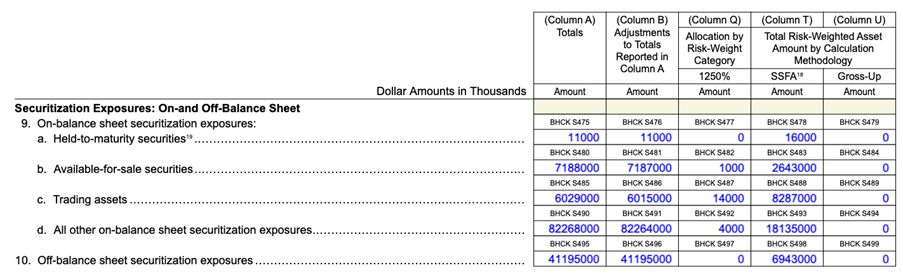

In [9]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'sec.png'

# Displaying the image
display(Image(filename=image_path))


Types of Securitized Assets:

The bank engages in securitizing various types of assets, including residential and commercial mortgages.

Securitization Process and Proceeds:

The report details that the bank transfers residential mortgage loans to securitization trusts sponsored primarily by Government-Sponsored Enterprises (GSEs) or Government National Mortgage Association (GNMA) in the normal course of business. In return, the bank primarily receives residential mortgage-backed securities (RMBS).

The report mentions the proceeds from these loan sales and gains on securitizations for the years 2020, 2021, and 2022.

Level of Securitized Assets and Fair Value:

Substantially all of the securities received from these securitizations are classified as Level 2 within the fair value hierarchy, indicating that they are less frequently traded and their valuation relies on observable market data.

These securities are typically sold shortly after they are received by the bank.

Recognition of Gains and Accounting Treatment:

A majority of the first-lien residential mortgage loans securitized are initially classified as Loans Held for Sale (LHFS) and accounted for under the fair value option. The report provides figures for gains recognized on these LHFS prior to securitization for the years mentioned.

Repurchases from Securitization Trusts:

The bank also reports on instances where it has repurchased loans from securitization trusts.

This summary provides an overview of Bank of America's securitization activities as per their latest 10-K report. The bank's involvement in securitization primarily revolves around residential and commercial mortgages, with a clear process for transferring loans, receiving securities, and recognizing gains or losses. The financial details and the fair value classification of these securities are key aspects of their securitization activities.​

5\.  Level 1, Level 2, and Level 3 assets of the bank

Level 1 Assets:

These include cash and cash equivalents, certain time deposits placed, and other short-term investments like U.S. government securities and short-term commercial paper. The 10-K specifically mentions amounts for time deposits placed and other short-term investments.

Level 2 Assets:

Level 2 assets and liabilities consist of those for which valuation is derived from inputs other than direct Level 1 prices. These include quoted prices for comparable instruments in less active markets, or other elements that are either directly or indirectly observable within the marketplace over the duration of the instruments' life.

Such financial items typically encompass debt securities that do not trade as often as those on major exchanges and derivatives with values calculated from models based on observable market inputs or those that can be validated by market data.

This category generally covers U.S. government and agency mortgage-backed and asset-backed securities, corporate debt, derivative agreements, certain categories of loans, and loans held for sale.

The 10-K provides detailed figures for these assets, including federal funds sold and securities borrowed or purchased under agreements to resell, and the fair value of financial instruments like loans and loans held-for-sale.

Level 3 Assets:

Level 3 assets and liabilities are characterized by the use of unobservable inputs that are not substantiated by significant market activity but are pivotal to the fair value assessment of the financial instruments. The valuation of these instruments necessitates a considerable degree of managerial discernment or estimation.

Typically, the fair value is ascertained through the employment of pricing models, methodologies for discounting cash flows, or analogous techniques that integrate the assumptions an entity in the market would employ to price the asset or liability.

This category commonly includes interests retained in securitizations, consumer mortgage servicing rights (MSRs), selected asset-backed securities (ABS), derivatives that are highly complex, structured, or have long-term contracts, certain categories of loans and loans held for sale (LHFS), interest rate lock commitments (IRLCs), and certain collateralized debt obligations (CDOs) for which independent pricing information is not obtainable for a substantial portion of the underlying assets.

The report also provides the percentage of total recurring Level 3 assets in relation to the total consolidated assets, as well as the percentage of total recurring Level 3 liabilities in relation to total consolidated liabilities.

6\.  Value at Risk, Expected Shortfall and other Risk Measures noted in the 10-K/10-Q

 I. VaR:

**Value at Risk (VaR)**: This is a statistical measure used by the bank to aggregate market risk factors, reflecting the potential loss not expected to be exceeded at a 99 percent confidence level over a one-day period. The bank uses a historical simulation approach based on a three-year historical data window for its VaR model across trading portfolios.

**Assumptions and Limitations of VaR**: The model's accuracy depends on historical data quality, and for new or less liquid products, proxies based on fundamental and statistical analysis are used.

**VaR Updates and Reviews**: The historical data for VaR is updated weekly or more frequently during market stress, and the underlying assumptions are regularly reviewed.

**Exclusions from VaR**: Some trading risks are not captured in VaR and are reviewed as part of the bank's Internal Capital Adequacy Assessment Process (ICAAP).

**VaR Model Management**: The Global Risk Management (GRM) team reviews, evaluates, and enhances the VaR model, with changes being approved before implementation.

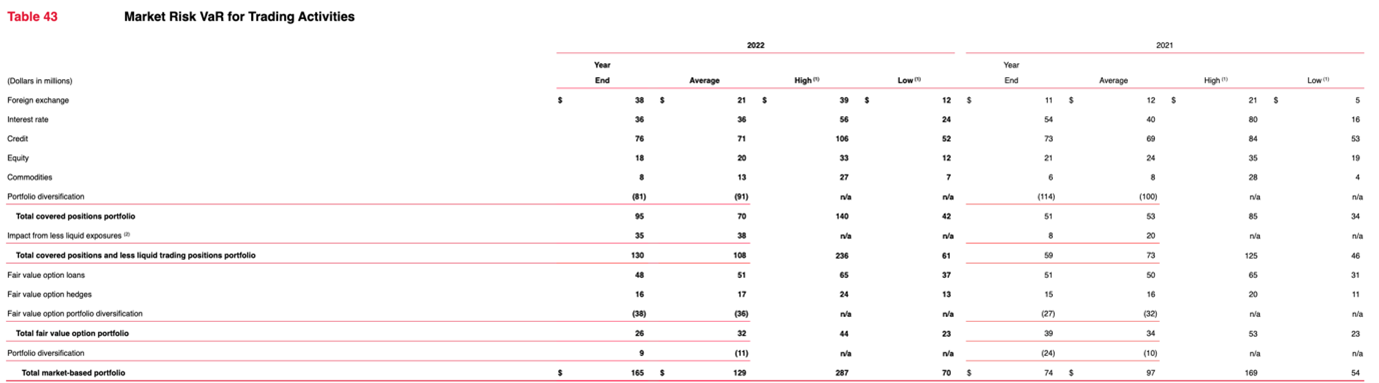

In [10]:
from IPython.display import Image, display

# Path to the image saved on disk
image_path = 'var-2.png'

# Displaying the image
display(Image(filename=image_path))


**Trading Limits**: Set by Global Markets Risk Management, these limits are reviewed regularly within the context of market liquidity, volatility, and business priorities.

**Risk Appetite Statement and Limits**: Critical measures and limits are identified in the bank's Risk Appetite Statement and are approved at least annually.

**Market Stress Response**: Senior leadership discusses key risk positions and potential limit excesses daily during periods of market stress, with the possibility of reducing risk selectively.

**Covered Positions**: Defined by regulatory standards, covered positions include the most liquid trading positions intended for short-term holding and are hedgeable in a two-way market. Foreign exchange and commodity positions are always considered covered, with certain exceptions.